<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
   Microsoft malware detection
</div>



__Goal:__ Predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. It is really important to find out whether the computer is infected and cure it.

from IPython.display import HTML

<a href="https://www.kaggle.com/c/microsoft-malware-prediction" target="_blank">
    <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/10683/logos/thumb76_76.png?t=2018-09-19-16-55-15"
         alt="Microsoft Malware Detection"
         width="76"/>
</a>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import time
import datetime


import gc
import warnings
from   tqdm import tqdm_notebook
import tqdm

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.style.use('ggplot')

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">
    2. Data Overview
</div>


The objective of this section is to:

Load the malware dataset

Perform an initial exploration of the available features

Since the dataset is very large, we will load only a subset of the data. Specifically, we will read 4,000,000 rows of the malware dataset using pd.read_csv() to make analysis more manageable.

Due to large size of the dataset i am pasting the link ref> https://www.kaggle.com/competitions/microsoft-malware-prediction/data
    

In [2]:
%%time
n_rows = 400000
malware_df = pd.read_csv(r"malware_df/train.csv",nrows=n_rows,low_memory=False)

CPU times: total: 5.89 s
Wall time: 5.9 s


In [3]:
malware_df.sample(6)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
282587,081fa2e06636ebf2fa4b42176a67facc,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,167,860.0,NaN,277.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Notebook,Windows.Desktop,2668.0,170875.0,4.0,5.0,2640.0,NaN,476940.0,HDD,430111.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,NaN,0.0,10.0.17134.165,amd64,rs4_release,17134,165,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,8.0,31,FullAuto,0,IS_GENUINE,OEM:DM,0.0,0.0,Retail,0.0,628.0,23575.0,1,0.0,0.0,0,0,0.0,0.0,11.0,1
346955,09fac8ca13f376621f8eaa2435d8bf65,win8defender,1.1.15100.1,4.13.17134.1,1.273.330.0,0,0.0,1,NaN,11280.0,2.0,1.0,1,211,24475.0,27.0,277.0,75,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Detachable,Windows.Desktop,1443.0,256454.0,4.0,5.0,2697.0,NaN,244198.0,SSD,230996.0,0,8192.0,Laptop,13.3,1920.0,1080.0,Mobile,NaN,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,8.0,31,FullAuto,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,355.0,7362.0,1,NaN,0.0,1,0,0.0,0.0,10.0,1
340803,09cd4d90e1c8a9f48c376f067cc551ec,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1826.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,80,7198.0,27.0,101.0,75,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,0.0,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,4730.0,311910.0,4.0,5.0,2255.0,NaN,476940.0,HDD,237967.0,0,6144.0,Laptop,15.5,1366.0,768.0,Mobile,NaN,0.0,10.0.17134.228,amd64,rs4_release,17134,228,Core,CORE,Upgrade,6.0,28,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,897.0,7464.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
387715,0b2700c62309fb6ff6459fddfb4fd29c,win8defender,1.1.15100.1,4.9.10586.0,1.273.1127.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,57,88318.0,NaN,76.0,222,windows10,x64,10.0.0.0,10586,768,th2,10586.17.amd64fre.th2_release.151121-2308,Home,1.0,0,NaN,0.0,76.0,ExistsNotSet,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,1.0,186.0,NaN,476940.0,HDD,456063.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,lion,0.0,10.0.10586.36,amd64,th2_release,10586,36,Core,CORE,Other,8.0,35,UNKNO

In [4]:
malware_df.isnull().sum()

MachineIdentifier                                         0
ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
RtpStateBitfield                                       1490
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            380697
AVProductStatesIdentifier                              1624
AVProductsInstalled                                    1624
AVProductsEnabled                                      1624
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        14525
OrganizationIdentifier                               123314
GeoNameIdentifier                       


<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">Data Description</div>


The dataset consists of telemetry information collected by Microsoft’s endpoint protection system, Windows Defender. This data is generated by combining heartbeat reports and threat detection reports, along with information about malware infections observed on individual machines.

Each row in the dataset represents a single machine, uniquely identified by a MachineIdentifier. The target variable, HasDetections, serves as the ground-truth label and indicates whether malware was detected on that machine.

To satisfy business constraints, including user privacy and time-based considerations, the dataset was created using a specific sampling strategy. Although malware detection is inherently a time-series problem, it is complicated by factors such as machines frequently going online or offline, receiving system updates or patches, and upgrading operating systems. Additionally, this dataset does not reflect the true distribution of Microsoft customer devices in the real world, as it intentionally contains a higher proportion of malware-infected machines to support effective model training.

Some feature names are either unavailable or self-explanatory and are therefore marked as “NA”.

Feature Overview

The dataset contains 82 features, which can be broadly grouped into the following categories:

Defender and antivirus configuration
(e.g., ProductName, EngineVersion, AppVersion, AvSigVersion, IsProtected)

System and OS information
(e.g., Platform, Processor, OsVer, OsBuild, SkuEdition, Census_OSVersion)

Geographical and locale data
(e.g., CountryIdentifier, CityIdentifier, GeoNameIdentifier, LocaleEnglishNameIdentifier)

Hardware and device characteristics
(e.g., Census_ProcessorCoreCount, Census_TotalPhysicalRAM, Census_PrimaryDiskTypeName, Census_ChassisTypeName)

Security and protection settings
(e.g., Firewall, UacLuaenable, SmartScreen, Census_IsSecureBootEnabled)

Usage and capability indicators
(e.g., Census_IsVirtualDevice, Census_IsTouchEnabled, Wdft_IsGamer)

The full list of columns includes identifiers, OS attributes, hardware specifications, security configurations, and behavioral indicators, all of which collectively help determine whether a machine is likely to be infected with malware.

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">Optimizing the Memmory Usage</div>

In [5]:
# total memory uage
malware_df.memory_usage(deep=True).sum()/1024*2

np.float64(1665763.818359375)

In [6]:
malware_df.dtypes

MachineIdentifier                                     object
ProductName                                           object
EngineVersion                                         object
AppVersion                                            object
AvSigVersion                                          object
IsBeta                                                 int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                       int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                                 int64
CountryIdentifier                                      int64
CityIdentifier                                       float64
OrganizationIdentifier                               float64
GeoNameIdentifier       

Some features in the dataset consume more memory than necessary due to inefficient data types. By optimizing column data types, we can significantly reduce memory usage, which in turn improves computational efficiency and speeds up processing.

To address this, we will define a function that downcasts data types where possible.

Common Data Types and Memory Usage

int8 / uint8: Uses 1 byte of memory

Value range: −128 to 127 (int8), 0 to 255 (uint8)

bool: Uses 1 byte of memory

Stores True or False

float16 / int16 / uint16: Uses 2 bytes of memory

Value range: −32,768 to 32,767 (int16), 0 to 65,535 (uint16)

float32 / int32 / uint32: Uses 4 bytes of memory

Value range: −2,147,483,648 to 2,147,483,647 (int32)

float64 / int64 / uint64: Uses 8 bytes of memory

Reducing higher-precision types to smaller, appropriate data types helps optimize memory consumption without losing meaningful information.

In [7]:
print(f"int64 min : {np.iinfo(np.int64).min}")
print(f"int64 max : {np.iinfo(np.int64).max}")

int64 min : -9223372036854775808
int64 max : 9223372036854775807


In [8]:
if malware_df["IsBeta"].min()<np.iinfo(np.int8).min and malware_df["IsBeta"].max()<np.iinfo(np.int8).max:
                print("c")

In [9]:
def reduce_memory():
    converting_mem = ["int8","int16","int32","int64","float16","float32","float64"]
    memory_before = malware_df.memory_usage(deep=True).sum()/1024*2
    int_columns=malware_df.select_dtypes(include=["int8","int16","int32","int64"]).columns
    float_columns=malware_df.select_dtypes(include=["float16","float32","float64"]).columns
    for col in int_columns:
           
            if malware_df[col].min()>np.iinfo(np.int8).min and malware_df[col].max()<np.iinfo(np.int8).max:
                 malware_df[col] =  malware_df[col].astype(np.int8)
            elif malware_df[col].min()>np.iinfo(np.int16).min and malware_df[col].max()<np.iinfo(np.int16).max:
                malware_df[col] = malware_df[col].astype(np.int16)
            elif malware_df[col].min()>np.iinfo(np.int32).min and malware_df[col].max()<np.iinfo(np.int32).max:
                malware_df[col] = malware_df[col].astype(np.int32)
            elif malware_df[col].min()>np.iinfo(np.int64).min and malware_df[col].max()<np.iinfo(np.int64).max:
                malware_df[col] = malware_df[col].astype(np.int64)
    for col in float_columns:
        
             if malware_df[col].min()>np.finfo(np.float16).min and malware_df[col].max()<np.finfo(np.float16).max:
                malware_df[col] = malware_df[col].astype(np.float16)
             elif malware_df[col].min()>np.finfo(np.float32).min and malware_df[col].max()<np.finfo(np.float32).max:
                malware_df[col] = malware_df[col].astype(np.float32)
             elif malware_df[col].min()>np.finfo(np.float64).min and malware_df[col].max()<np.finfo(np.float64).max:
                malware_df[col] = malware_df[col].astype(np.float64)
    
    memory_after = malware_df.memory_usage(deep=True).sum()/1024*2
    print(f"percentage of memory reduction: {100*(memory_after/memory_before)}")


In [10]:
reduce_memory()

percentage of memory reduction: 85.3670732120913


<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">Understanding the Data</div>

__Get the ShAPE__

In [11]:
malware_df.shape

(400000, 83)

In [12]:
malware_df.describe()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning:

overflow encountered in cast

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\numpy\_core\_methods.py:49: RuntimeWarning:

overflow encountered in reduce

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\numpy\_core\_methods.py:49: RuntimeWarning:

overflow encountered in reduce

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\core\nanops.py:1025: RuntimeWarning:

overflow encountered in cast

C:\

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,400000.000000,398510.0,400000.000000,19303.0,398376.000000,398376.0,398376.0,400000.000000,400000.000000,385475.000000,276686.0,399998.0,400000.000000,400000.000000,400000.000000,398386.0,400000.000000,376123.0,397313.0,395836.0,399510.0,395839.0,395516.000000,398130.0,398130.0,398127.0,3.976350e+05,3.976350e+05,400000.000000,396375.000000,397804.000000,397808.0,397808.0,3.878860e+05,400000.000000,400000.000000,397370.0,400000.000000,400000.000000,67960.0,392879.0,145957.0,391794.0,392827.000000,400000.000000,146301.0,399280.0,400000.000000,400000.000000,396808.0,386323.0,386323.0,400000.000000
mean,0.000013,NaN,0.017295,inf,47876.746094,NaN,NaN,0.987725,108.009405,81340.234375,NaN,NaN,122.998452,15715.759888,575.310925,NaN,0.000032,0.0,NaN,NaN,NaN,NaN,238921.640625,NaN,NaN,NaN,5.125474e+05,3.769364e+05,0.076622,6118.729004,NaN,NaN,NaN,1.123940e+09,15831.409820,973.123885,NaN,60.445535,0.000635,0.0,0.0,0.0,NaN,33037.265625,0.486330,0.0,0.0,0.125507,0.037992,0.0,NaN,NaN,0.501108
std,0.003536,0.0,0.130368,inf,13996.042969,0.0,0.0,0.110111,62.947983,48936.070312,0.0,0.0,69.444286,2193.858951,248.053174,0.0,0.005701,0.0,0.0,0.0,0.0,0.0,71971.140625,0.0,0.0,0.0,3.621932e+05,3.306198e+05,0.265992,5243.650879,0.000000,0.0,0.0,1.887870e+09,1963.269152,2929.005185,0.0,44.969982,0.025191,0.0,0.0,0.0,0.0,21202.513672,0.499814,0.0,0.0,0.331294,0.191178,0.0,0.0,0.0,0.499999
min,0.000000,0.0,0.000000,1.0,39.000000,1.0,0.0,0.000000,1.000000,5.000000,1.0,1.0,1.000000,7600.000000,16.000000,0.0,0.000000,0.0,1.0,0.0,0.0,47.0,22.000000,1.0,1.0,10.0,0.000000e+00,0.000000e+00,0.000000,512.000000,4.699219,-1.0,-1.0,0.000000e+00,7601.000000,0.000000,1.0,5.000000,0.000000,0.0,0.0,0.0,9.0,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000
25%,0.000000,7.0,0.000000,788.0,49480.000000,1.0,1.0,1.000000,51.000000,36825.000000,18.0,89.0,75.000000,15063.000000,256.000000,1.0,0.000000,0.0,111.0,1.0,1.0,1443.0,189586.000000,2.0,5.0,1998.0,2.393720e+05,1.207750e+05,0.000000,4096.000000,13.898438,1366.0,768.0,0.000000e+00,15063.000000,165.000000,8.0,31.000000,0.000000,0.0,0.0,0.0,142.0,13169.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.0,0.000000
50%,0.000000,7.0,0.000000,1632.0,53447.000000,1.0,1.0,1.000000,97.000000,82373.000000,27.0,181.0,88.000000,16299.000000,768.000000,1.0,0.000000,0.0,117.0,1.0,1.0,2102.0,246715.000000,4.0,5.0,2500.0,4.769400e+05,2.494490e+05,0.000000,4096.000000,15.500000,1366.0,768.0,0.000000e+00,16299.000000,285.000000,9.0,34.000000,0.000000,0.0,0.0,0.0,500.0,33070.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,10.0,1.000000
75%,0.000000,7.0,0.000000,2338.0,53447.000000,2.0,1.0,1.000000,162.000000,124098.000000,27.0,267.0,182.000000,17134.000000,768.000000,1.0,0

__Missing Values and Unique Values__

In [13]:
data_understand = pd.DataFrame(columns=["Unique_Values","Missing_values","Missing_percentage"])
for col in malware_df.columns:
    Unique_Values=malware_df[col].nunique()
    Missing_values=malware_df[col].isnull().sum()
    Missing_percentage=100*Missing_values/malware_df.shape[0]
    data_understand.loc[col] = [Unique_Values,Missing_values,Missing_percentage]

In [14]:
data_understand

,Unique_Values,Missing_values,Missing_percentage
MachineIdentifier,400000.0,0.0,0.00000
ProductName,4.0,0.0,0.00000
EngineVersion,54.0,0.0,0.00000
AppVersion,89.0,0.0,0.00000
AvSigVersion,6161.0,0.0,0.00000
IsBeta,2.0,0.0,0.00000
RtpStateBitfield,6.0,1490.0,0.37250
IsSxsPassiveMode,2.0,0.0,0.00000
DefaultBrowsersIdentifier,477.0,380697.0,95.17425
AVProductStatesIdentifier,4789.0,1624.0,0.40600


In [15]:
data_understand.sort_values(by='Unique_Values',ascending=False)

,Unique_Values,Missing_values,Missing_percentage
MachineIdentifier,400000.0,0.0,0.00000
Census_SystemVolumeTotalCapacity,123178.0,2365.0,0.59125
Census_OEMModelIdentifier,36060.0,4484.0,1.12100
CityIdentifier,33503.0,14525.0,3.63125
Census_FirmwareVersionIdentifier,21867.0,7173.0,1.79325
AvSigVersion,6161.0,0.0,0.00000
AVProductStatesIdentifier,4789.0,1624.0,0.40600
Census_InternalBatteryNumberOfCharges,4468.0,12114.0,3.02850
Census_ProcessorModelIdentifier,1723.0,1873.0,0.46825
Census_OEMNameIdentifier,1231.0,4161.0,1.04025


__Sorting by missing Values by percentage of missing__

In [16]:
data_understand.sort_values(by='Missing_percentage',ascending=False)

,Unique_Values,Missing_values,Missing_percentage
PuaMode,1.0,399894.0,99.97350
Census_ProcessorClass,3.0,398292.0,99.57300
DefaultBrowsersIdentifier,477.0,380697.0,95.17425
Census_IsFlightingInternal,2.0,332040.0,83.01000
Census_InternalBatteryType,28.0,284118.0,71.02950
Census_ThresholdOptIn,2.0,254043.0,63.51075
Census_IsWIMBootEnabled,1.0,253699.0,63.42475
SmartScreen,12.0,142735.0,35.68375
OrganizationIdentifier,43.0,123314.0,30.82850
SMode,2.0,23877.0,5.96925


__Inference__


Several notable observations emerge from this analysis:

The columns PuaMode and Census_ProcessorClass contain more than 99% missing values, indicating that they are unlikely to contribute meaningful information and can be dropped at this stage.

In the DefaultBrowsersIdentifier column, approximately 95% of the entries belong to a single category, suggesting very low variability and limited predictive value.

There are 26 columns where a single category accounts for around 90% of the values. Such highly imbalanced features may be candidates for removal, depending on their relevance.

Some features, such as Census_IsWIMBootEnabled, exhibit no variance at all, making them uninformative and suitable for elimination.

Additionally, several features are labeled as numerical but are more appropriately treated as categorical variables (for example, CityIdentifier). This distinction will be explored further in subsequent steps.

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">DATA CLEANING</div>

__Goal__

Dropping the column based on previous section

define the datatype for categorical column

In [17]:
# drop the column which have 90% misssing values
drop_col=list(data_understand.loc[data_understand["Missing_percentage"]>=90].index)
drop_val_col=[col for col in drop_col]
malware_df.drop(columns=drop_col, inplace=True, errors="ignore")


In [18]:
# drop the column which contain 90 percentage of value
for col in malware_df.columns:
    if malware_df[col].value_counts(normalize=True,dropna=False).iloc[0]>.9:
        malware_df.drop(columns=col, inplace=True, errors="ignore")
        drop_val_col.append(col)

In [19]:
# drop the column which have 1 unique value
drop_unique = data_understand.loc[data_understand["Unique_Values"]==1].index
for col in drop_unique:
  malware_df.drop(columns=col,inplace=True,errors='ignore')
  drop_val_col.append(col)

In [20]:
drop_val_col

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'ProductName',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductsEnabled',
 'HasTpm',
 'Platform',
 'Processor',
 'OsVer',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_DeviceFamily',
 'Census_HasOpticalDiskDrive',
 'Census_OSArchitecture',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_FlightRing',
 'Census_IsVirtualDevice',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'PuaMode',
 'Census_IsWIMBootEnabled']

In [21]:
malware_df.shape

(400000, 56)

In [22]:
import os
if 'cleaned_df.csv' not in  os.listdir(r"malware_df"):
    malware_df.to_csv(r"malware_df/cleaned_df.csv")
  

__Defining Datatypes for categorical column__

In real-world datasets, many variables that appear numerical are actually just identifiers. In this dataset, only a small number of variables are genuinely numerical. Based on the data description, identify and list the variables that are truly numerical.

In [23]:
true_numerical=[
 'AVProductsInstalled',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges'
]


Binary columns

In [24]:
binary_columns = [bc for bc in malware_df.columns if malware_df[bc].nunique()==2]

In [25]:
binary_columns 

['Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer',
 'HasDetections']

Finally create categorical columns

In [26]:
true_numerical+binary_columns

['AVProductsInstalled',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer',
 'HasDetections']

In [27]:
categorical_columns = [c for c in malware_df.columns if c not in (true_numerical+binary_columns)]

In [28]:
len(categorical_columns)

41

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">EXPLORATORY DATA ANALYSIS</div>

What is EDA

Exploratory Data Analysis (EDA) is a technique used to examine and understand datasets by identifying patterns, trends, and hidden insights. It helps determine whether certain features are useful for predicting the target (Y) variable. EDA mainly relies on visualization and summary statistics to explore the data and understand its behavior beyond formal modeling or hypothesis testing.

Purpose

The main purpose of EDA is to gain an overall understanding of the dataset before applying machine learning models or statistical techniques. It allows analysts to explore data characteristics, detect issues, and make informed decisions about preprocessing and feature selection.

Advantages and Importance

EDA plays a crucial role in improving data quality and model performance. It helps uncover relationships between variables, identify missing values and outliers, and avoid incorrect assumptions. By providing meaningful insights, EDA supports better business understanding and more reliable predictive modeling.

Exploratory Data Analysis focuses on understanding what the data reveals on its own. Rather than immediately applying complex models, EDA emphasizes visual exploration and descriptive analysis to uncover useful information and guide further analysis.

__The goals of this section are to:__

Examine the proportion of columns based on their data types

Encode categorical variables appropriately

Determine whether the target variable is balanced or requires balancing techniques

Analyze correlations among features to identify variables that provide similar information

Extract insights or relationships that are valuable from a business perspective

Perform statistical significance tests on categorical features

<H3>1 Examine the proportion of columns based on their data types</H3>

In [29]:
train = malware_df.copy()

In [30]:
train.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,355.0,20050.0,0,0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,1443.0,331929.0,4.0,5.0,2500.0,476940.0,HDD,101900.0,6144.0,Portable,14.000000,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.17134.191,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto,IS_GENUINE,Retail,0.0,0.0,355.0,19844.0,0,0,0.0,1.0,1


In [31]:
train.drop(0,inplace=True)

In [32]:
var = {"true_numerical":len(true_numerical),
       "binary_columns":len(binary_columns),
       "categorical_columns":len(categorical_columns)}

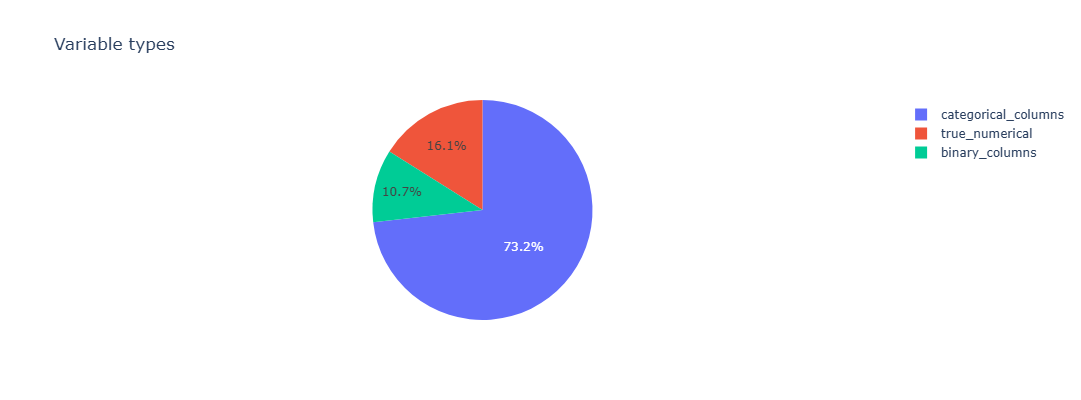

In [33]:
pie_perc = go.Pie(
    labels=list(var.keys()),
    values=list(var.values())
)
layout    = dict(title= "Variable types", height=400, width=800)
fig       = dict(data=[pie_perc], layout=layout)
py.iplot(fig)

__Inference__

most of the features are categorical variable

<h2>2 Checking the cardinality of a categorical variable</h2>

In [34]:
cardinality = []
for c in categorical_columns:
    if c == "MachineIdentifier":
        continue
    else:
        cardinality.append([c,train[c].nunique()])

In [35]:
cardinality

[['EngineVersion', 54],
 ['AppVersion', 89],
 ['AvSigVersion', 6161],
 ['AVProductStatesIdentifier', 4789],
 ['CountryIdentifier', 222],
 ['CityIdentifier', 33503],
 ['OrganizationIdentifier', 43],
 ['GeoNameIdentifier', 265],
 ['LocaleEnglishNameIdentifier', 226],
 ['OsBuild', 50],
 ['OsSuite', 9],
 ['OsPlatformSubRelease', 9],
 ['OsBuildLab', 451],
 ['SkuEdition', 8],
 ['IeVerIdentifier', 183],
 ['SmartScreen', 12],
 ['Census_MDC2FormFactor', 12],
 ['Census_OEMNameIdentifier', 1231],
 ['Census_OEMModelIdentifier', 36059],
 ['Census_ProcessorManufacturerIdentifier', 4],
 ['Census_ProcessorModelIdentifier', 1723],
 ['Census_PrimaryDiskTypeName', 4],
 ['Census_ChassisTypeName', 33],
 ['Census_PowerPlatformRoleName', 9],
 ['Census_InternalBatteryType', 28],
 ['Census_OSVersion', 296],
 ['Census_OSBranch', 15],
 ['Census_OSBuildNumber', 57],
 ['Census_OSBuildRevision', 233],
 ['Census_OSEdition', 21],
 ['Census_OSSkuName', 20],
 ['Census_OSInstallTypeName', 9],
 ['Census_OSInstallLanguage

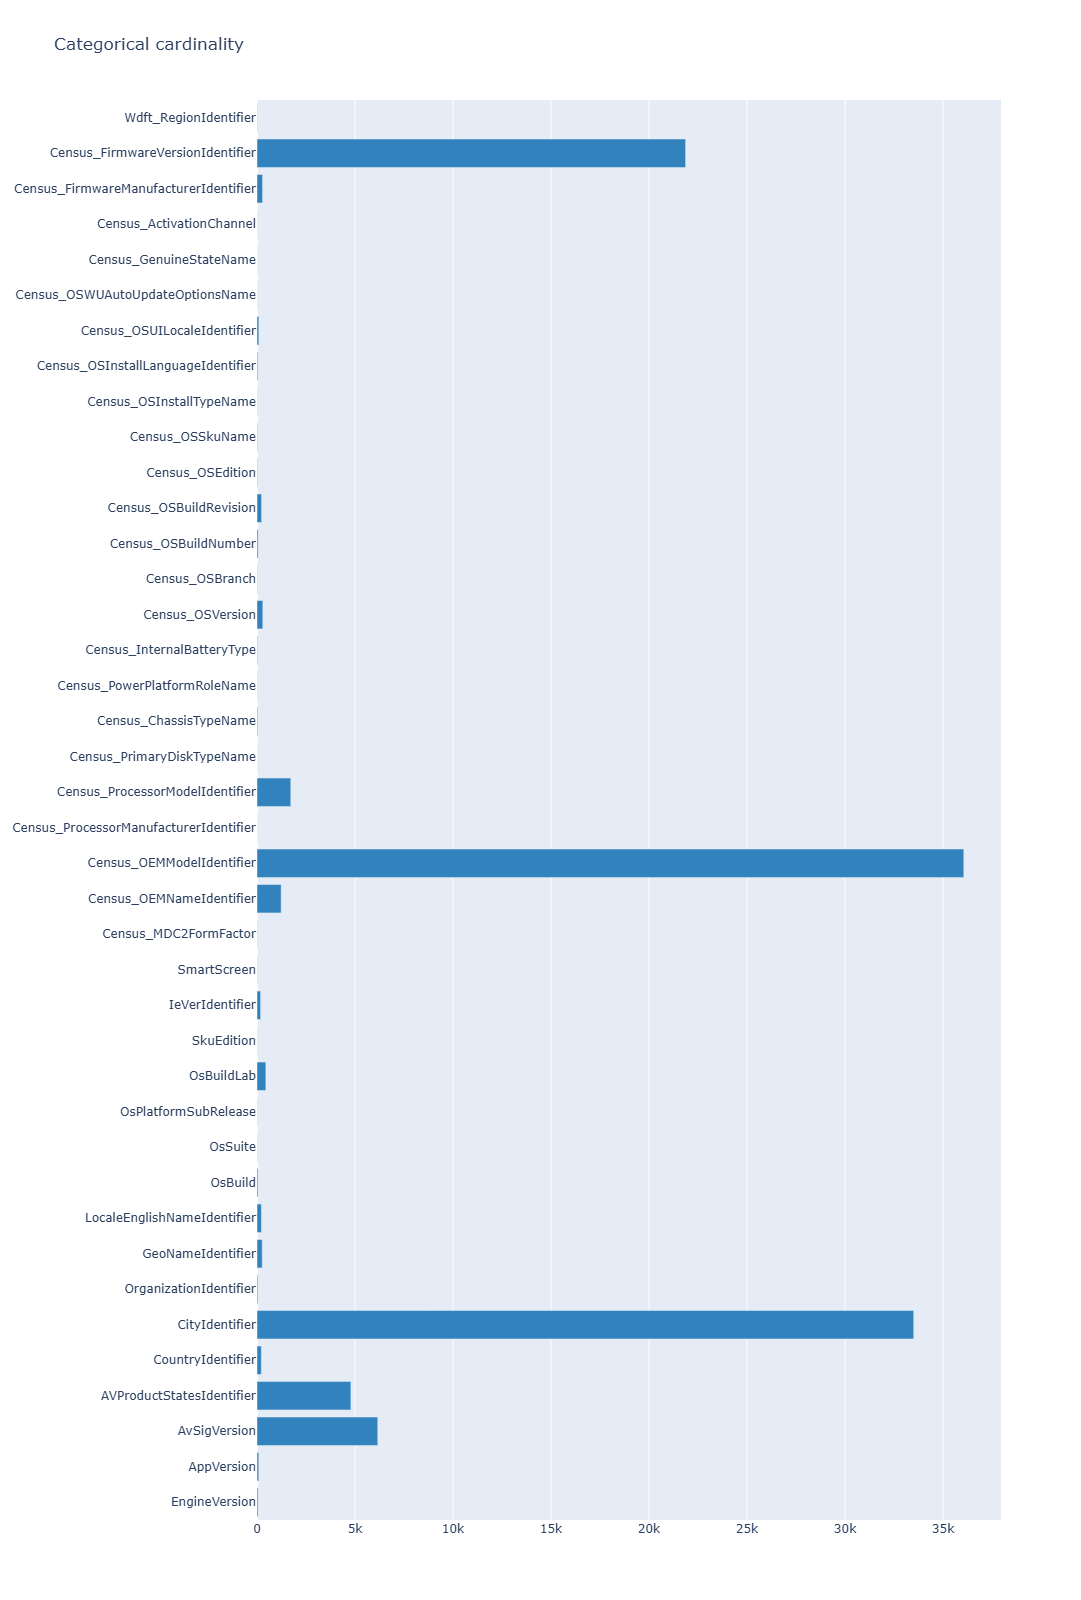

In [36]:
trace = go.Bar(y=[x[0] for x in cardinality],
               x=[x[1] for x in cardinality],
               orientation='h', marker=dict(color='rgb(49,130,189)'), name='train')
layout    = dict(title='Categorical cardinality', height=1600, width=800)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [37]:
len([c for c,n in cardinality if n>30])

23

__INFERENCE__

23 variables have high cardinality (more than 30 unique values). During feature engineering, we will treat them differently.


<h3> 3 Check distribution of target variable</h3>

In [38]:
malware_df['HasDetections'].value_counts()

HasDetections
1    200443
0    199557
Name: count, dtype: int64

<Axes: xlabel='HasDetections'>

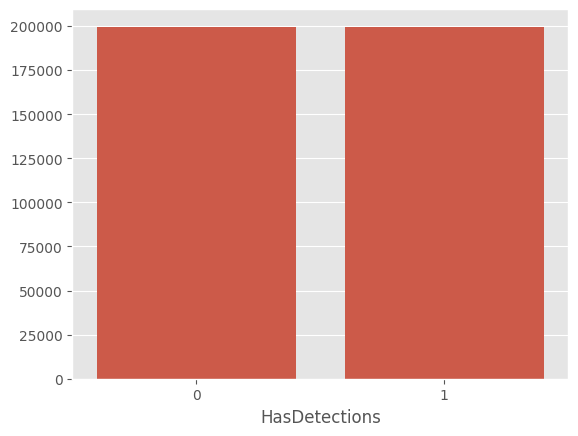

In [39]:
counts = malware_df['HasDetections'].value_counts()
sns.barplot(x=counts.index, y=counts[0])


__INFERENCE__

Target is balanced

<h3>4 Check the correlation</h3>

<Axes: >

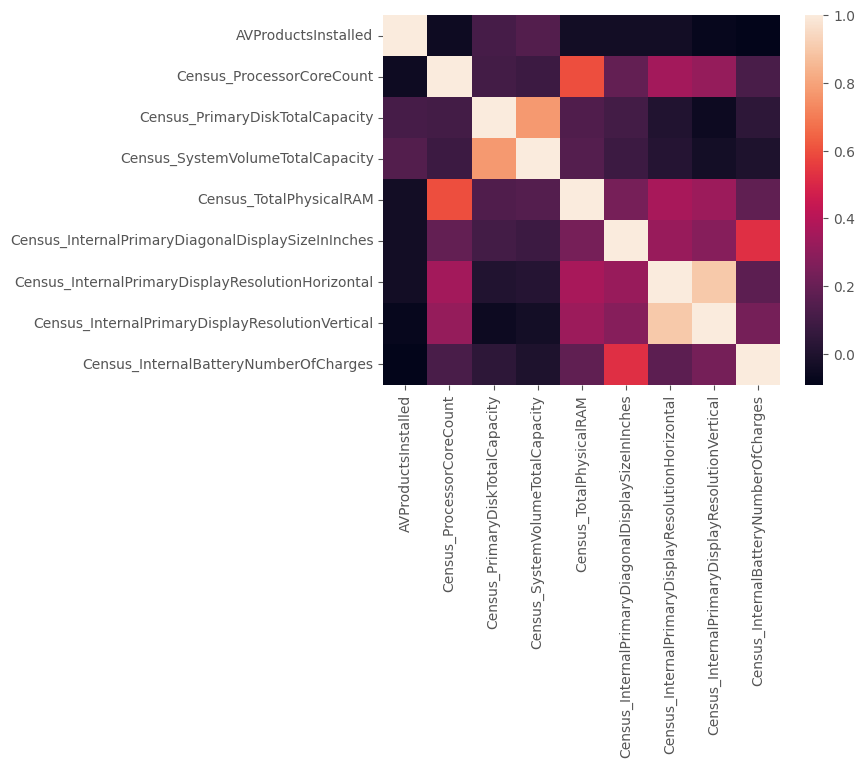

In [40]:
sns.heatmap(malware_df[true_numerical].corr())

<h2>Understanding each features detection rate</h2>

In [41]:
def detection_groupby_feature(col,top_n,by_touch=False):
    if not by_touch:
        top_n = top_n if malware_df[col].nunique()>top_n else malware_df[col].nunique()
        print(f"{col} has {malware_df[col].nunique()}")
        print(f"{col} we selecting {top_n} columns out of it")
        top_cat = list(malware_df[col].value_counts(dropna=False).index[:top_n])
        df_has_detection = malware_df.loc[((malware_df[col].isin(top_cat)) & (malware_df['HasDetections']==1)),col].value_counts().head(10).sort_index()
        df_hasno_detection = malware_df.loc[(malware_df[col].isin(top_cat)) & (malware_df['HasDetections']==0),col].value_counts().head(10).sort_index()
    
        data= [go.Bar(x=df_has_detection.index,y=df_has_detection.values,name='has_detection'),
               go.Bar(x=df_hasno_detection.index, y=df_hasno_detection.values, name='No Detections')]
    
        layout = dict(title=f"Counts of {col} by top-{top_n} categories",height=1600, width=800)
        fig = go.Figure(data=data, layout=layout)
        fig.show()
    
    else:
        top_n = top_n if malware_df[col].nunique()>top_n else malware_df[col].nunique()
        top_cat = list(malware_df[col].value_counts(dropna=False).index[:top_n])
        top_cat_df = malware_df[col].isin(top_cat)
       
        df_touch_enabled = malware_df.loc[(malware_df[col].isin(top_cat)) & (malware_df['Census_IsTouchEnabled'] == 1),[col,'HasDetections']]
        df_touch_disabled = malware_df.loc[( malware_df[col].isin(top_cat)) & (malware_df['Census_IsTouchEnabled']==0),[col,'HasDetections']]
        
        
        df_touch_enabled[col] = df_touch_enabled[col].fillna('unknown').astype(str)
        df_touch_disabled[col] = df_touch_disabled[col].fillna('unknown').astype(str)

        df_touch_enabled_counts =df_touch_enabled.groupby(col).agg({'HasDetections':['count','mean']})
        df_touch_disabled_counts =  df_touch_disabled.groupby(col).agg({'HasDetections':['count','mean']})
  
        categories = sorted(set(df_touch_enabled_counts.index) | set(df_touch_disabled_counts.index))
        df_touch_enabled_counts=df_touch_enabled_counts.reindex(categories,fill_value=0).reset_index()
        df_touch_disabled_counts=df_touch_disabled_counts.reindex(categories,fill_value=0).reset_index()
        df_touch_enabled_counts.columns = [col,'count', 'mean']
        df_touch_disabled_counts.columns = [col,'count', 'mean']
        
        
       
        x=np.arange(len(categories))
        width = 0.35
        fig, ax1 = plt.subplots(figsize=(8,6))
        
        
        ax1.bar(x-width/2,
               df_touch_enabled_counts['count'],
               width=0.4,
               label='Touch Enabled')
        ax2 = ax1.twinx()
        ax2.plot(categories,
               df_touch_enabled_counts['mean'],
               marker='o',
               label='Touch enaled')

        ax1.bar(x+width/2,
               df_touch_disabled_counts['count'],
               width=0.4,
               label='Touch disabled')
        ax2.plot(categories,
               df_touch_disabled_counts['mean'],
                marker='x',
               label='Touch Disabled',)

        ax1.set_xticks(x)
        ax1.set_xticklabels(categories, rotation=90)
        ax1.set_ylabel('count')
        ax2.set_xlabel("detection rate")
        ax1.legend()

        plt.show()
        

<h2>'AVProductsInstalled'</h2>

Census_IsTouchEnabled has 2
Census_IsTouchEnabled we selecting 2 columns out of it


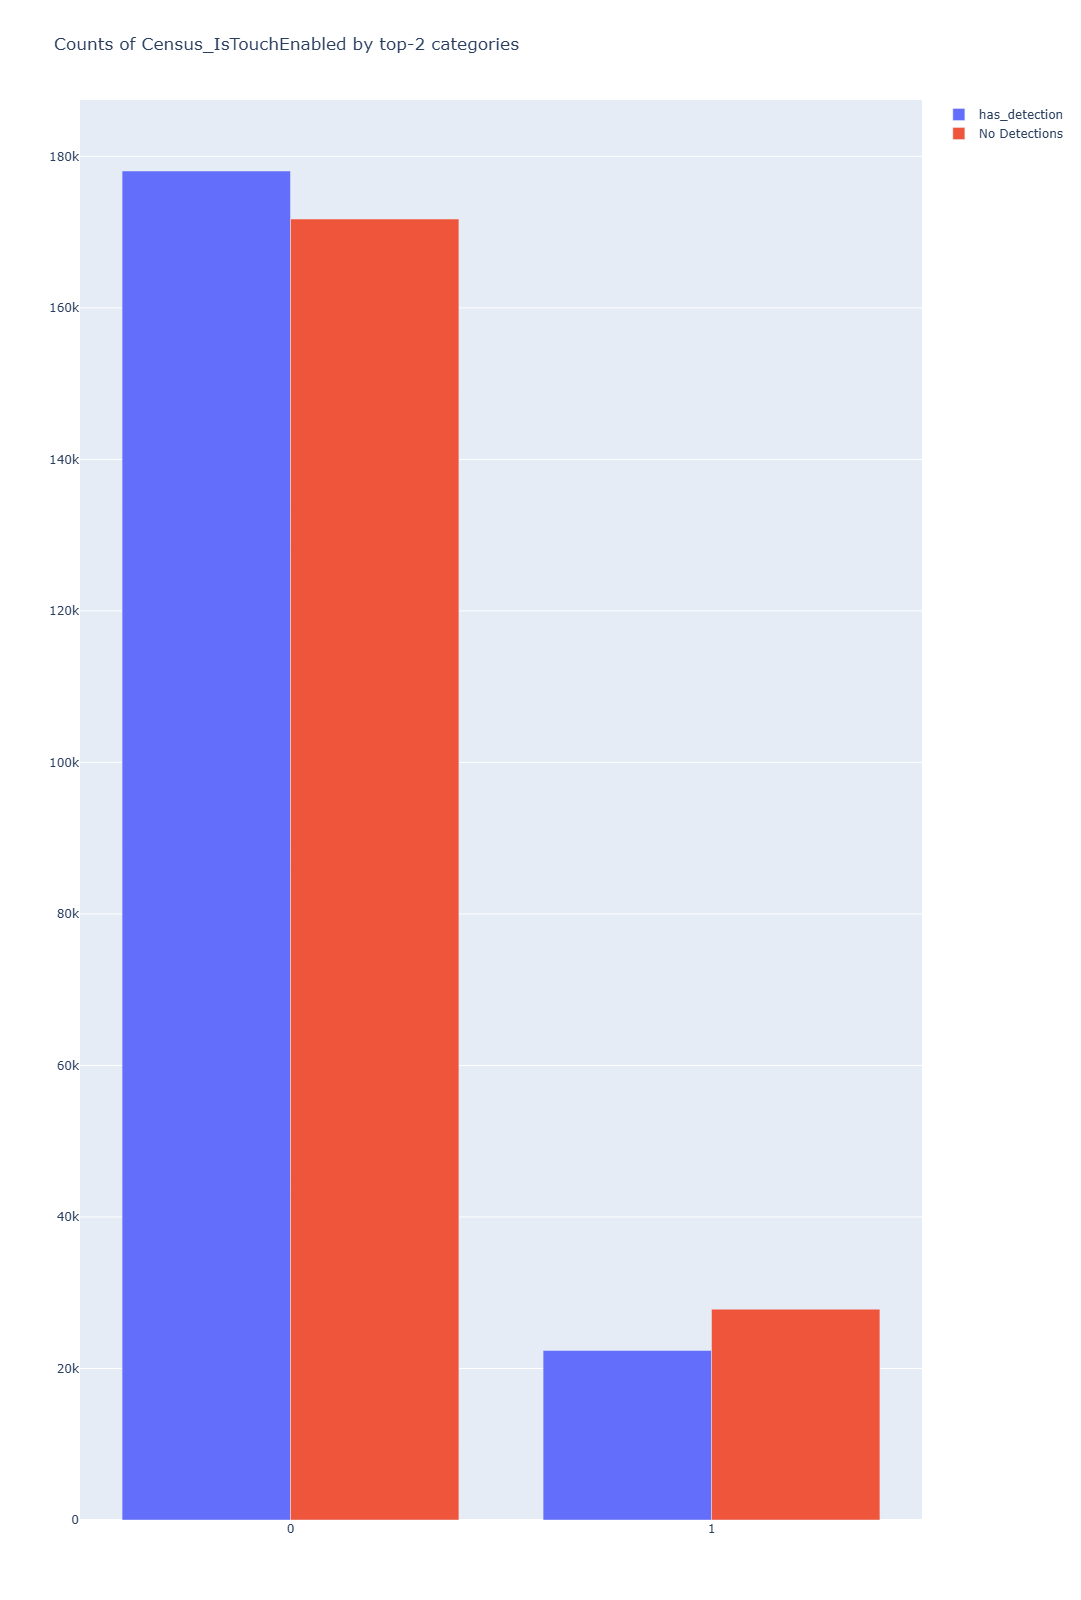

In [42]:
detection_groupby_feature("Census_IsTouchEnabled",top_n=10,by_touch=False)

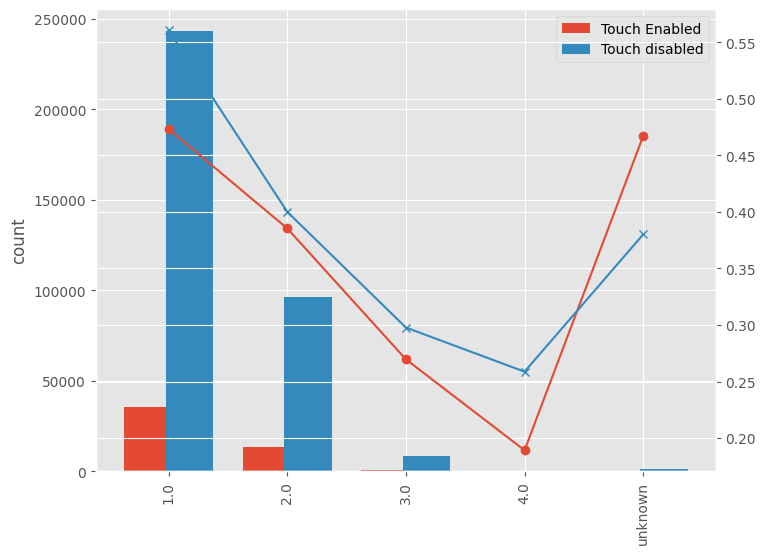

In [43]:
detection_groupby_feature('AVProductsInstalled',top_n=10,by_touch=True)

__INFERENCE__

detection rate for touch disable devices having installed 1 antivirus software is higher as compare to detection rate for touch enabled devices.increasing number of antivirus software installation will decrease the detection rate for both touch enabled and touch disabled one .4 Antivirus installed devices are lower detection, which means lower virus


<h2>OsPlatformSubRelease</h2>

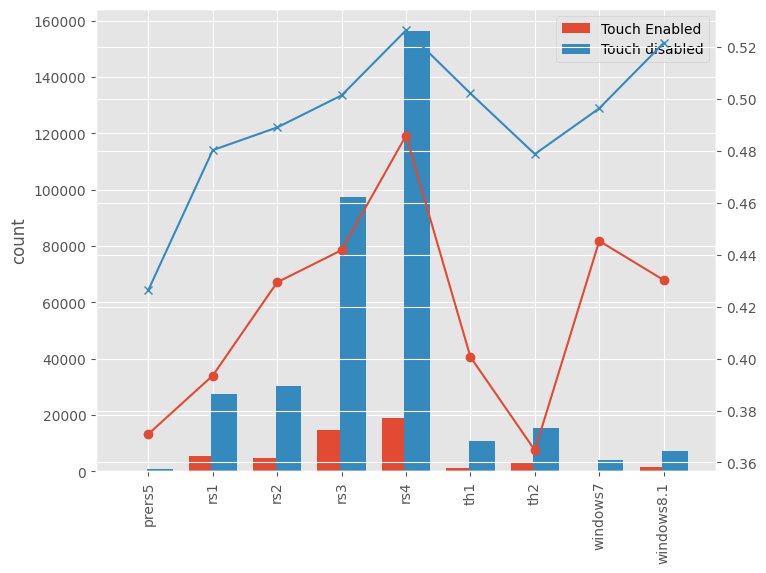

In [44]:
detection_groupby_feature('OsPlatformSubRelease',top_n=10,by_touch=True)

__INFERENCE__

Most of the devices used windows10(rs4)

Windows rs4 have higher detection rate(for both touch enabled and touch enabled)

th2 touch disabled have lower detection rate

windows 8.1 touch disabled having increased detection rate but touch disabled having declined detection rate

<h2>Census_ProcessorCoreCount</h2>

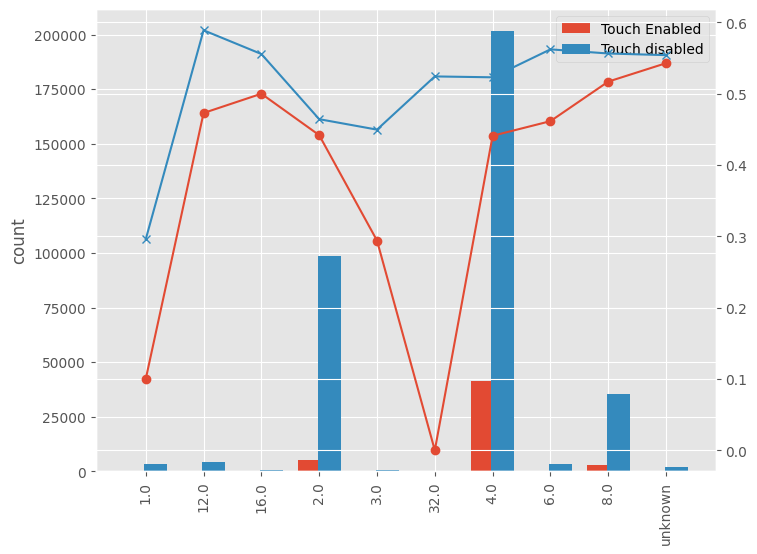

In [45]:
detection_groupby_feature('Census_ProcessorCoreCount',top_n=10,by_touch=True)

__INFERENCE__

Among Touch enabled Census_ProcessorCoreCount 32.0 shows the lower detection rate, which indicates lower number of viruses. but after that detection rate is improved significantly

Most of the devices contain Census_ProcessorCoreCount 4.0,comparing with other processor which have good detection rate


<h2>Census_TotalPhysicalRAM</h2>

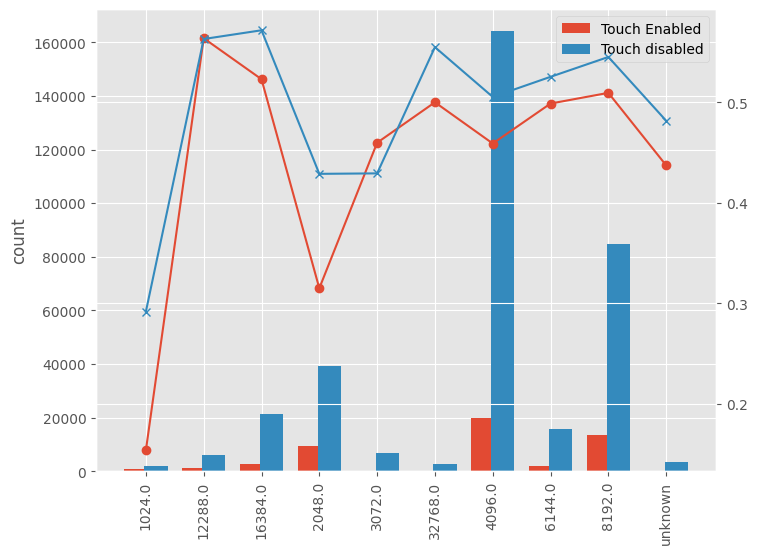

In [46]:
detection_groupby_feature('Census_TotalPhysicalRAM',top_n=10,by_touch=True)

Increasing pysical RAM size means improve the detection rate for both touch enabled and touch disabled devices

<h2>Census_InternalPrimaryDiagonalDisplaySizeInInches</h2>

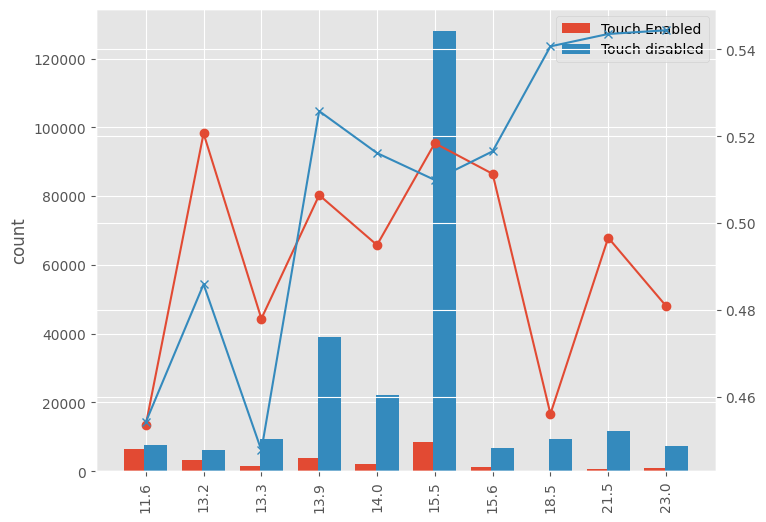

In [47]:
detection_groupby_feature('Census_InternalPrimaryDiagonalDisplaySizeInInches',top_n=10,by_touch=True)

__INFERENCE__

Most of the devices were 15.5inch display.

In touch disabled devices increasing the display screen size shows increasing detection rate



<h2>Census_PowerPlatformRoleName</h2>

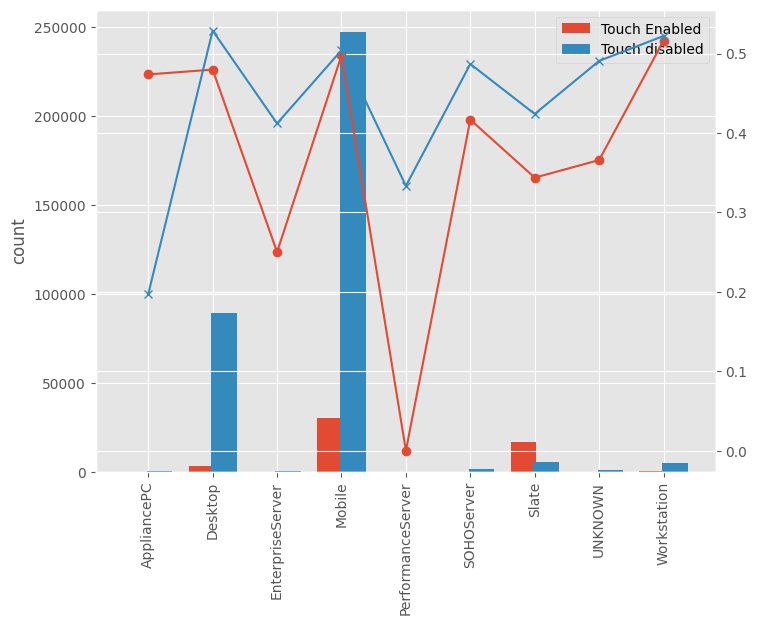

In [48]:
detection_groupby_feature('Census_PowerPlatformRoleName',top_n=10,by_touch=True)

__Inference__

Touch disabled desktop have the higher detection rate,but when it comes to touch enabled devices detection rate mobile have the higher detection rate

Malware detection varies by device role: desktops and mobiles show higher detection rates due to greater user interaction, while servers have lower rates because of controlled environments. Touch capability further influences detection patterns, making device role and touch status important features for malware prediction models.

<h2>Checking the numerical variable to the Target variable</h2>

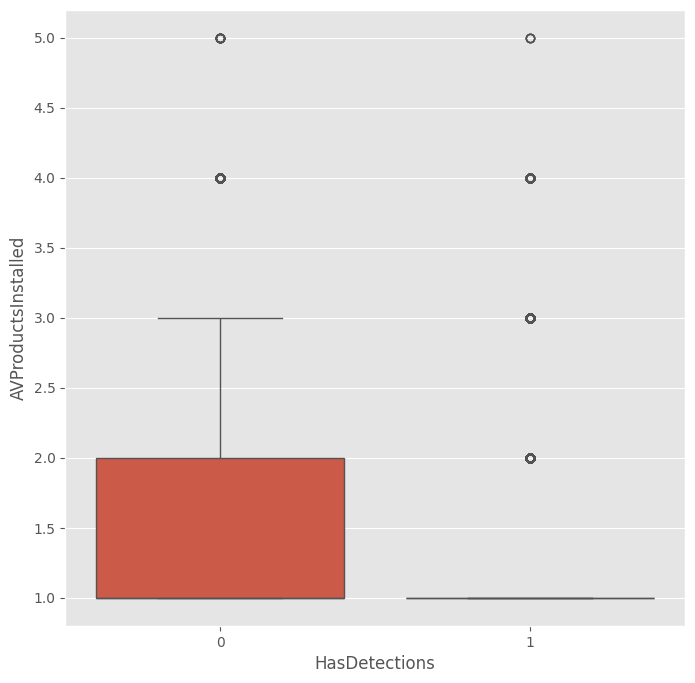

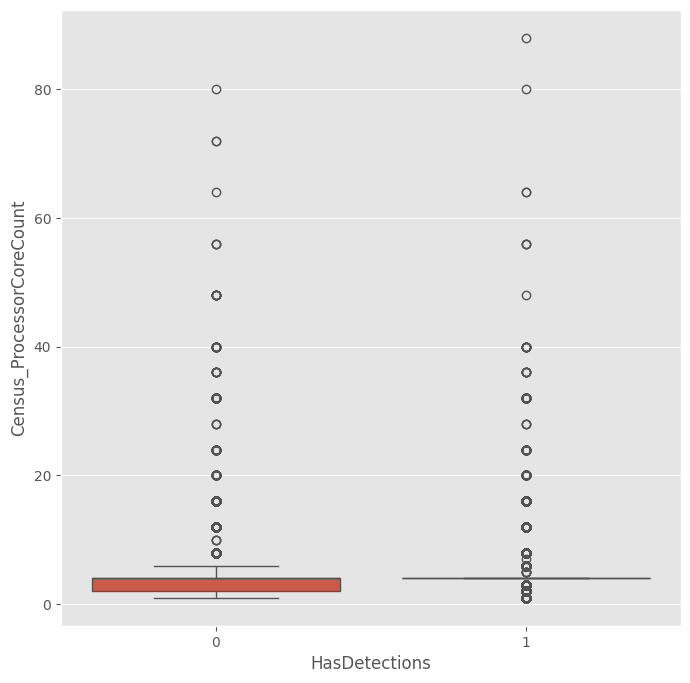

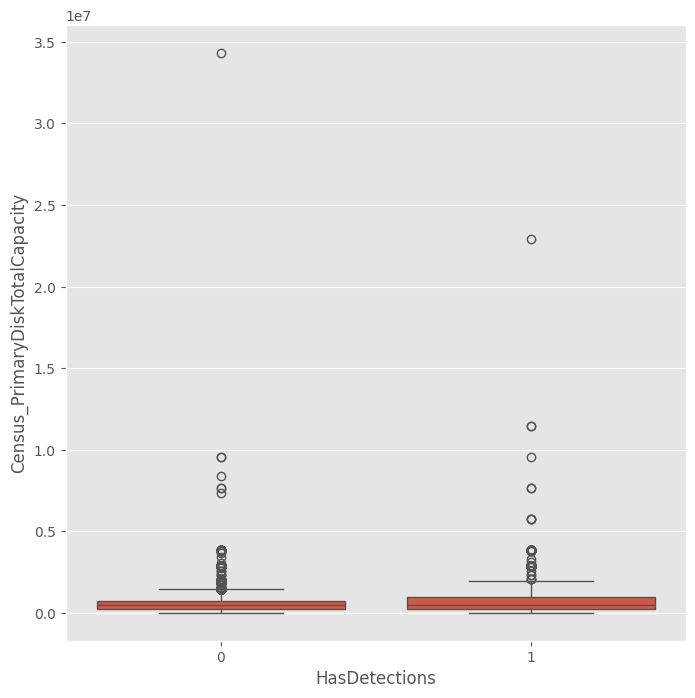

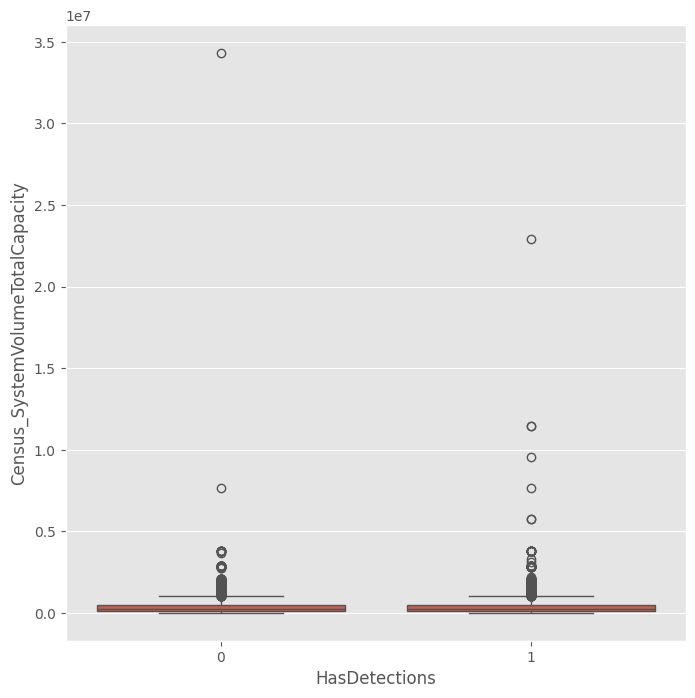

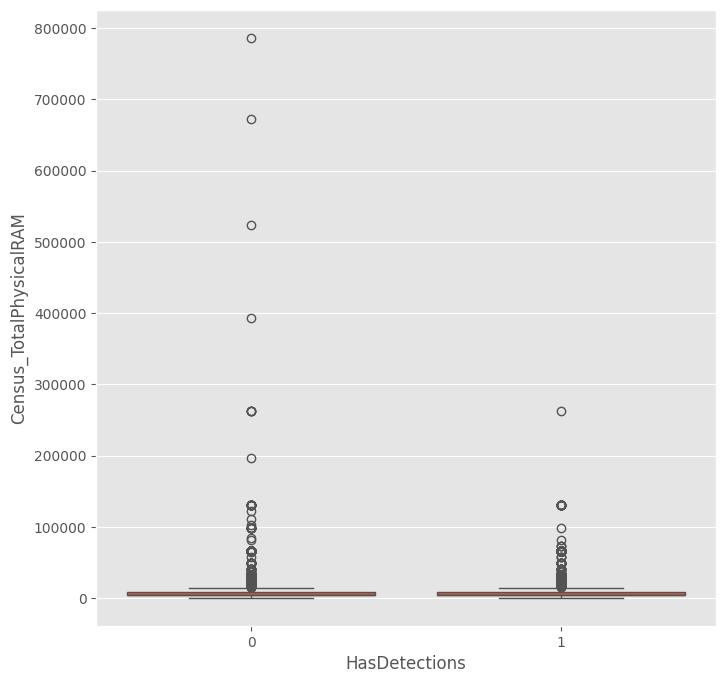

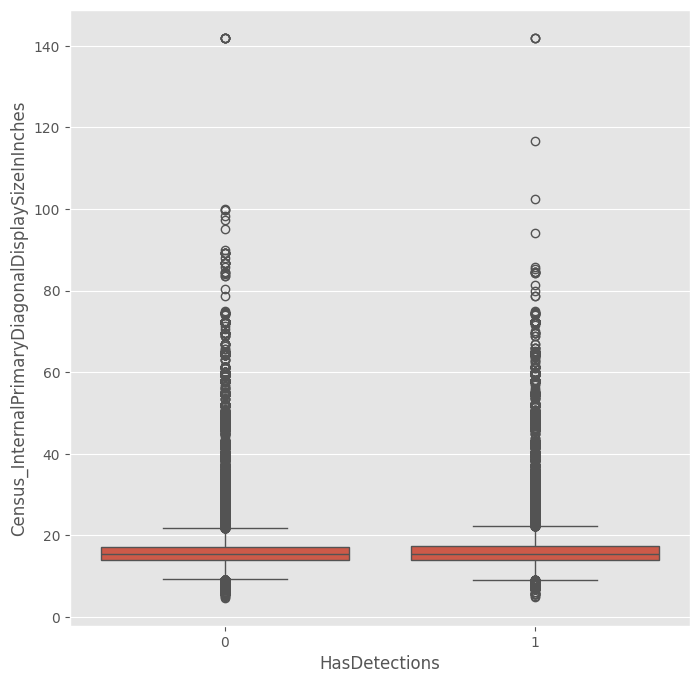

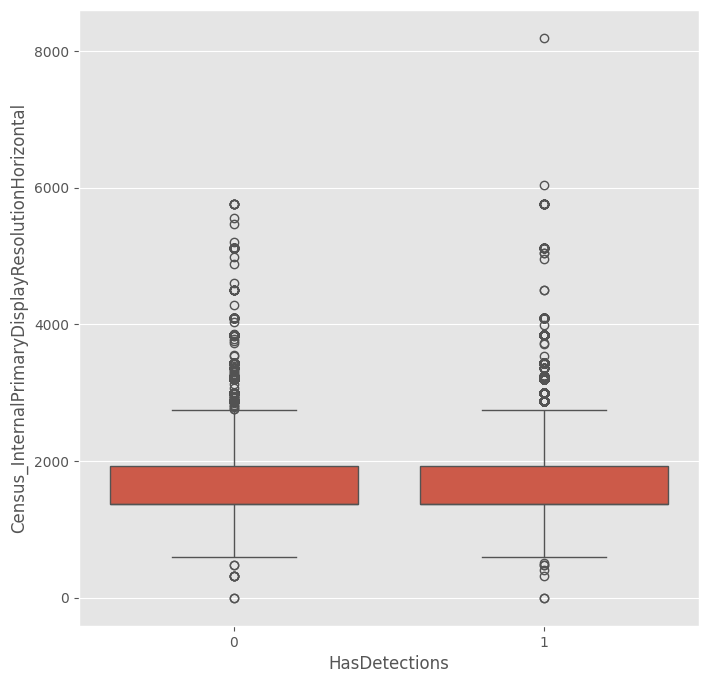

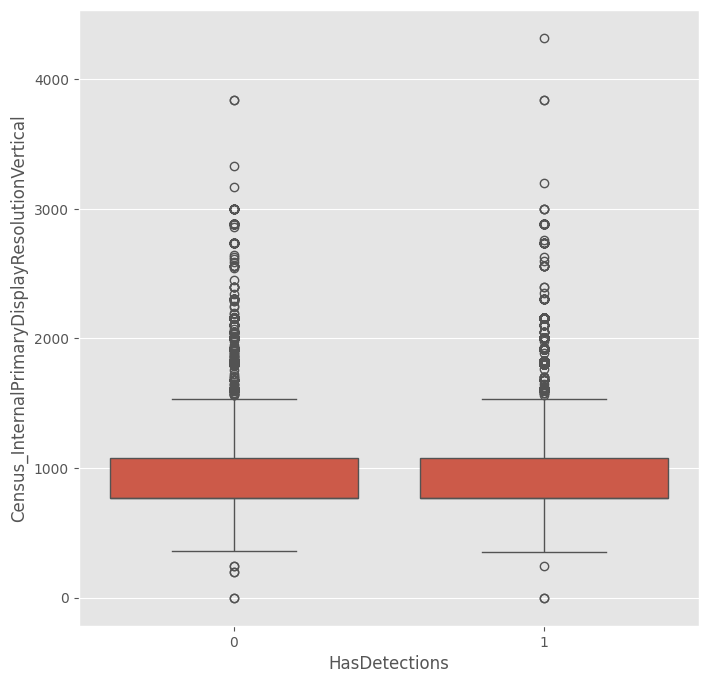

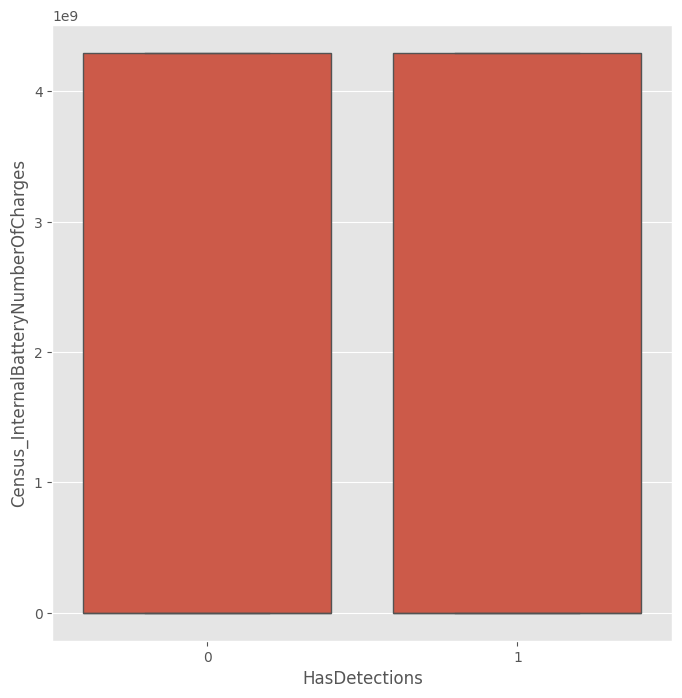

In [49]:
for i,num in enumerate(true_numerical):
    plt.figure(figsize=(8,8))
    
    sns.boxplot(x='HasDetections',y=num,data=malware_df)
plt.show()

__INFERENCE__

When HasDetections = 0 (No malware)

Most systems have 1–2 antivirus products

Median is around 1

Wider spread → more variation

Some systems have up to 3 AV products

🔹 When HasDetections = 1 (Malware detected)

Most systems have exactly 1 antivirus

Very little variation

Few outliers with 2 or 3 AV products

<h2>Perform statistical significance tests on categorical features</h2>

In [50]:
from scipy.stats import chi2_contingency

In [51]:
malware_df[categorical_columns+binary_columns]

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,5.0,2340.0,HDD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,628.0,36144.0,10.0,NaN,NaN,0,0,0.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,5.0,2404.0,HDD,Notebook,Mobile,NaN,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,628.0,57858.0,8.0,NaN,NaN,0,0,0.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,5.0,1972.0,SSD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,142.0,52682.0,3.0,NaN,NaN,0,0,0.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,5.0,2272.0,UNKNOWN,MiniTower,Desktop,NaN,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,355.0,20050.0,3.0,NaN,NaN,0,0,0.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,1443.0,331929.0,5.0,2500.0,HDD,Portable,Mobile,lion,10.0.17134.191,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto,IS_GENUINE,Retail,355.0,19844.0,1.0,0.0,0.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0b811c2969b76a1cc48d93c7cd8c1bc6,1.1.15100.1,4.18.1807.18075,1.273.703.0,53447.0,169,53686.0,NaN,209.0,179,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,Off,Desktop,2668.0,3254.0,5.0,3224.0,SSD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,28.0,123,FullAuto,IS_GENUINE,OEM:NONSLP,628.0,18649.0,3.0,NaN,NaN,0,0,0.0,1
399996,0b811c89b96088cf276857da722c0f16,1.1.15100.1,4.18.1806.18062,1.273.499.0,53447.0,68,19586.0,27.0,276.0,74,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,RequireAdmin,Desktop,2102.0,230100.0,5.0,2684.0,SSD,Desktop,Desktop,NaN,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:DM,93.0,33054.0,12.0,NaN,NaN,1,0,0.0,1
399997,0b811f5d5a019d5a8e95c9d2e370bf7f,1.1.15100.1,4.18.1807.18075,1.273.1693.0,61343.0,53,NaN,27.0,71.

In [52]:
significant = []
for cat in categorical_columns[1:]+binary_columns:
    gr=pd.crosstab(malware_df[cat].astype('str'),malware_df['HasDetections'].astype('category'))
    chi,p,dof,expec=chi2_contingency(gr)
    print(f"{cat.ljust(40)},{chi:.5f} , {p:.5f}")
    if p < 0.05:
     significant.append([cat,p])

EngineVersion                           ,6311.07599 , 0.00000
AppVersion                              ,4716.02066 , 0.00000
AvSigVersion                            ,14394.92083 , 0.00000
AVProductStatesIdentifier               ,19931.10821 , 0.00000
CountryIdentifier                       ,3440.35375 , 0.00000
CityIdentifier                          ,37128.60993 , 0.00000
OrganizationIdentifier                  ,169.03393 , 0.00000
GeoNameIdentifier                       ,2512.78455 , 0.00000
LocaleEnglishNameIdentifier             ,2179.68686 , 0.00000
OsBuild                                 ,783.32368 , 0.00000
OsSuite                                 ,271.54312 , 0.00000
OsPlatformSubRelease                    ,715.06731 , 0.00000
OsBuildLab                              ,3813.46427 , 0.00000
SkuEdition                              ,241.04685 , 0.00000
IeVerIdentifier                         ,1414.26754 , 0.00000
SmartScreen                             ,20808.98914 , 0.00000
Census_MD

In [53]:
significant

[['EngineVersion', np.float64(0.0)],
 ['AppVersion', np.float64(0.0)],
 ['AvSigVersion', np.float64(0.0)],
 ['AVProductStatesIdentifier', np.float64(0.0)],
 ['CountryIdentifier', np.float64(0.0)],
 ['CityIdentifier', np.float64(4.972005874262756e-42)],
 ['OrganizationIdentifier', np.float64(7.430419769381634e-17)],
 ['GeoNameIdentifier', np.float64(0.0)],
 ['LocaleEnglishNameIdentifier', np.float64(0.0)],
 ['OsBuild', np.float64(5.798257583011975e-133)],
 ['OsSuite', np.float64(4.6245229136698464e-54)],
 ['OsPlatformSubRelease', np.float64(4.0790201165057195e-149)],
 ['OsBuildLab', np.float64(0.0)],
 ['SkuEdition', np.float64(2.225719882515149e-48)],
 ['IeVerIdentifier', np.float64(4.831808278714738e-189)],
 ['SmartScreen', np.float64(0.0)],
 ['Census_MDC2FormFactor', np.float64(0.0)],
 ['Census_OEMNameIdentifier', np.float64(0.0)],
 ['Census_OEMModelIdentifier', np.float64(1.5270047021665042e-188)],
 ['Census_ProcessorManufacturerIdentifier', np.float64(4.557256444175254e-11)],
 ['Cen

In [54]:
len(significant)

45

<h2>ODDS RATIO</h2>

In [55]:
def odd_ratio(cat):
 ctab = pd.crosstab(malware_df[cat].astype('str'),malware_df['HasDetections'].astype('category'))
 ctab.columns = ctab.columns.add_categories('odds')
 ctab['odds']=ctab[1]/ctab[0]
 ctab.columns = ctab.columns.add_categories("odds_ratio")
 ctab["odds_ratio"]=ctab['odds']/(np.sum(ctab[1])/np.sum(ctab[0]))
 return ctab

In [56]:
odd_ratio("OsPlatformSubRelease")

HasDetections,0,1,odds,odds_ratio
OsPlatformSubRelease,,,,
prers5,534,385,0.720974,0.717787
rs1,17515,15268,0.871710,0.867857
rs2,18332,16974,0.925922,0.921829
rs3,56752,55299,0.974397,0.970090
rs4,83787,91507,1.092138,1.087311
th1,6143,5942,0.967280,0.963004
th2,10046,8539,0.849990,0.846233
windows7,2158,2114,0.979611,0.975281
windows8.1,4290,4415,1.029138,1.024589


__INFERENCE__

rs4 has the highest malware detection odds, so it’s the riskiest platform in this dataset.

prers5 and th2 are relatively safer (lowest odds).

Odds ratios >1 → increased risk, <1 → decreased risk compared to baseline.

__ODDS RATIO FOR CountryIdentifier__

In [57]:
odds_df=odd_ratio("CountryIdentifier")

In [58]:
odds_df

HasDetections,0,1,odds,odds_ratio
CountryIdentifier,,,,
1,63,44,0.698413,0.695326
10,7,12,1.714286,1.706708
100,590,748,1.267797,1.262193
101,1945,1725,0.886889,0.882969
102,585,502,0.858120,0.854327
103,75,87,1.160000,1.154873
104,453,892,1.969095,1.960391
105,11,17,1.545455,1.538623
106,26,16,0.615385,0.612664


In [59]:
odds_df[odds_df['odds_ratio']>1].shape

(77, 4)

In [60]:
odds_df.nlargest(10,columns='odds_ratio')

HasDetections,0,1,odds,odds_ratio
CountryIdentifier,,,,
190,134,265,1.977612,1.968870
104,453,892,1.969095,1.960391
131,314,549,1.748408,1.740679
61,194,333,1.716495,1.708908
10,7,12,1.714286,1.706708
95,918,1549,1.687364,1.679905
214,3247,5231,1.611026,1.603904
163,168,270,1.607143,1.600039
105,11,17,1.545455,1.538623


__INFERENCE__

The results highlight the top 10 countries with the greatest malware detection risk. All selected countries have odds ratios > 1, meaning they are more prone to malware detections than the baseline. Countries 190 and 104 rank highest, showing nearly twice the odds of detection. This confirms that the model captures strong country-level risk patterns, and CountryIdentifier is a high-impact feature. Lower-ranked countries in the top 10 still show consistently elevated risk, reinforcing the geographical influence on malware prevalence.

also there are 77 countries which have odds ratio greate than 1(highly affected)

__odd_ratio FOR 'SkuEdition'__

In [61]:
odd_ratio('SkuEdition')

HasDetections,0,1,odds,odds_ratio
SkuEdition,,,,
Cloud,156,89,0.570513,0.567991
Education,852,911,1.069249,1.064523
Enterprise,780,807,1.034615,1.030042
Enterprise LTSB,433,520,1.200924,1.195615
Home,125360,121975,0.972998,0.968697
Invalid,1864,1730,0.928112,0.924009
Pro,70006,74372,1.062366,1.057670
Server,106,39,0.367925,0.366298


__INFERENCE__

The odds ratio analysis for SkuEdition shows clear variation in malware detection risk across Windows editions. Enterprise LTSB has the highest odds ratio (~1.20), indicating a noticeably higher likelihood of malware detection compared to the reference group. Education, Enterprise, and Pro editions also have odds ratios slightly above 1, suggesting a marginally higher risk. In contrast, Cloud, Home, Invalid, and Server editions have odds ratios below 1, indicating a lower probability of malware detection. Overall, SkuEdition is a meaningful categorical feature, with enterprise-oriented editions showing relatively higher detection rates.


__ODD RATIO FOR Census_MDC2FormFactor__

In [62]:
odd_ratio('Census_MDC2FormFactor')

HasDetections,0,1,odds,odds_ratio
Census_MDC2FormFactor,,,,
AllInOne,6347,6852,1.079565,1.074793
Convertible,9071,9170,1.010914,1.006445
Desktop,41462,45842,1.105639,1.100752
Detachable,8439,4966,0.588458,0.585857
LargeServer,30,13,0.433333,0.431418
LargeTablet,2039,914,0.448259,0.446278
MediumServer,103,47,0.456311,0.454294
Notebook,127439,129256,1.014258,1.009775
PCOther,3259,2994,0.918687,0.914626


__Inference:__

Desktop and All-in-One devices show higher malware detection risk, while Notebooks and Convertibles are near average. Tablets and Server form factors have much lower odds, indicating reduced malware exposure.

__ODD RATIO FOR  Census_ProcessorManufacturerIdentifier__

In [63]:
odd_ratio('Census_ProcessorManufacturerIdentifier')

HasDetections,0,1,odds,odds_ratio
Census_ProcessorManufacturerIdentifier,,,,
1.0,23635,23174,0.980495,0.976161
10.0,20,0,0.000000,0.000000
3.0,9,1,0.111111,0.110620
5.0,175058,176233,1.006712,1.002262
nan,835,1035,1.239521,1.234042


__Inference:__


Most processor manufacturers show near-neutral risk (odds ratio ≈ 1). The unknown (NaN) category has a higher malware detection likelihood, while rare manufacturers show very low odds, likely due to small sample sizes.

__ODD RATIO FOR  Census_PrimaryDiskTypeName__

In [64]:
odd_ratio('Census_PrimaryDiskTypeName')

HasDetections,0,1,odds,odds_ratio
Census_PrimaryDiskTypeName,,,,
HDD,127713,132349,1.036300,1.031719
SSD,55918,54992,0.983440,0.979093
UNKNOWN,8749,7177,0.820322,0.816696
Unspecified,6852,5642,0.823409,0.819770
nan,325,283,0.870769,0.866920


__Inference:__

HDD systems have slightly higher malware detection odds, while SSD systems show marginally lower risk. UNKNOWN, Unspecified, and NaN disk types have lower odds, possibly reflecting incomplete or inconsistent device information.

__ODD RATIO FOR  Census_ChassisTypeName__

In [65]:
odd_ratio('Census_ChassisTypeName')

HasDetections,0,1,odds,odds_ratio
Census_ChassisTypeName,,,,
0,2,4,2.000000,1.991160
30,8,3,0.375000,0.373342
32,0,1,inf,inf
35,3,0,0.000000,0.000000
36,1,0,0.000000,0.000000
82,0,1,inf,inf
AllinOne,4441,4856,1.093447,1.088614
Blade,2,2,1.000000,0.995580
BusExpansionChassis,22,12,0.545455,0.543044


__Inference:__

Desktop, MiniTower, and All-in-One chassis show higher malware detection odds, while laptops/notebooks are near neutral. Detachable, handheld, tablet, and mini PCs have lower odds, indicating reduced risk. Categories with very small counts (0/inf odds) are unreliable.

__ODD RATIO FOR  Census_PowerPlatformRoleName__

In [66]:
odd_ratio('Census_PowerPlatformRoleName')

HasDetections,0,1,odds,odds_ratio
Census_PowerPlatformRoleName,,,,
AppliancePC,120,36,0.300000,0.298674
Desktop,43792,48790,1.114130,1.109206
EnterpriseServer,200,139,0.695000,0.691928
Mobile,137798,139682,1.013672,1.009192
PerformanceServer,2,1,0.500000,0.497790
SOHOServer,883,836,0.946772,0.942587
Slate,13965,7974,0.570999,0.568475
UNKNOWN,464,437,0.941810,0.937647
Workstation,2333,2546,1.091299,1.086475


__Inference:__

Desktop and Workstation roles have higher malware detection odds, while Mobile is near neutral. Slate and AppliancePC show lower risk, and server roles generally have reduced odds. NaN/very small counts are unreliable.

__ODD RATIO FOR  Census_OSEdition__

In [67]:
odd_ratio('Census_OSEdition')

HasDetections,0,1,odds,odds_ratio
Census_OSEdition,,,,
Cloud,169,104,0.615385,0.612664
Core,82467,73315,0.889022,0.885093
CoreCountrySpecific,3746,3759,1.003470,0.999035
CoreN,117,112,0.957265,0.953034
CoreSingleLanguage,40595,46520,1.145954,1.140889
Education,839,929,1.107271,1.102376
EducationN,26,22,0.846154,0.842414
Enterprise,807,823,1.019827,1.015319
EnterpriseN,7,11,1.571429,1.564483


__Inference:__

CoreSingleLanguage, Professional, and Education variants show higher malware detection odds, while Core and Cloud editions have lower risk. Enterprise variants are mostly near neutral, and server editions generally show reduced odds. Categories with very small counts are unreliable.

__ODDS RATIO FOR Census_IsSecureBootEnabled__

In [68]:
odd_ratio('Census_IsSecureBootEnabled')

HasDetections,0,1,odds,odds_ratio
Census_IsSecureBootEnabled,,,,
0,102380,103088,1.006915,1.002465
1,97177,97355,1.001832,0.997403


__Inference:__

Secure Boot enabled or disabled shows almost no difference in malware detection risk, as odds ratios are ~1, indicating a neutral effect.

<h2>ANNOVA TEST</h2>

In [69]:
# from scipy.stats import f_oneway
# alpha=0.05
# significant_num = []
# unique_values=malware_df['HasDetections'].unique()
# for column in true_numerical:
#     gr = [malware_df[malware_df['HasDetections']==values][column].dropna() for values in unique_values]
#     f_stats,p = f_oneway(*gr)
#     print(f"Test on {column.ljust(40)},pvalue is {p:.5f}")
#     if p < 0.05:
#        significant_num.append(column)

__USING f_classify__

In [70]:
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
significant_anova = []
X = malware_df[true_numerical]
y = malware_df['HasDetections']
X = SimpleImputer(strategy='mean').fit_transform(X)
F, p = f_classif(X, y)
p_value=dict(zip(true_numerical,p))
f_value=dict(zip(true_numerical,F))
for col in p_value.keys():
    print(f"{col.ljust(20)} p value is {p_value[col]:.5f}")
    if p_value[col] < 0.05:
       significant_anova.append(col)

AVProductsInstalled  p value is 0.00000
Census_ProcessorCoreCount p value is 0.00000
Census_PrimaryDiskTotalCapacity p value is 0.00000
Census_SystemVolumeTotalCapacity p value is 0.00000
Census_TotalPhysicalRAM p value is 0.00000
Census_InternalPrimaryDiagonalDisplaySizeInInches p value is 0.00000
Census_InternalPrimaryDisplayResolutionHorizontal p value is 0.00000
Census_InternalPrimaryDisplayResolutionVertical p value is 0.00000
Census_InternalBatteryNumberOfCharges p value is 0.00000


__Using statsmodels.api__

In [71]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [72]:
for col in true_numerical:
    model = ols(f'{col}~C(HasDetections)',malware_df).fit()
    print(f"column_name = {col.ljust(50)},resid = {model.df_resid:.0f},f_value = {model.fvalue:0.5f},p_value={model.f_pvalue:0.5f}")
    res=sm.stats.anova_lm(model,typ=2)
    res
    

column_name = AVProductsInstalled                               ,resid = 398374,f_value = 9042.67485,p_value=0.00000
column_name = Census_ProcessorCoreCount                         ,resid = 398128,f_value = 1082.85792,p_value=0.00000
column_name = Census_PrimaryDiskTotalCapacity                   ,resid = 397633,f_value = 1156.36240,p_value=0.00000
column_name = Census_SystemVolumeTotalCapacity                  ,resid = 397633,f_value = 124.34727,p_value=0.00000
column_name = Census_TotalPhysicalRAM                           ,resid = 396373,f_value = 1127.66491,p_value=0.00000
column_name = Census_InternalPrimaryDiagonalDisplaySizeInInches ,resid = 397802,f_value = 463.68816,p_value=0.00000
column_name = Census_InternalPrimaryDisplayResolutionHorizontal ,resid = 397806,f_value = 372.26635,p_value=0.00000
column_name = Census_InternalPrimaryDisplayResolutionVertical   ,resid = 397806,f_value = 60.25475,p_value=0.00000
column_name = Census_InternalBatteryNumberOfCharges             ,resi

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">FEATURE ENGINEERING</div>

Feature Engineering is the process of creating, transforming, and selecting input variables (features) from raw data to improve the performance of machine learning models.

What Feature Engineering Does

It converts raw data into meaningful features that better represent the underlying problem, helping models learn patterns more effectively.

Key Objectives

Improve model accuracy and generalization

Reduce noise and redundancy

Make relationships in data more visible to the model

Adapt data to the assumptions of algorithms

Two main type of feature

<ol>
    <li>
        Domain specific feature
    </li>
    <li>
        Encoding categorical feature
    </li>
</ol>

<h2>Domain-specific features</h2> these are features created using expert knowledge of the problem domain. They capture real-world meaning that raw data or generic transformations cannot.

In [73]:
malware_df["EngineVersion_2"] = malware_df["EngineVersion"].apply(lambda x:x.split(".")[2]).astype("category")
malware_df["EngineVersion_3"] = malware_df["EngineVersion"].apply(lambda x:x.split(".")[3]).astype("category")


In [74]:
# appvesion
malware_df["AppVersion_1"] = malware_df["AppVersion"].apply(lambda x:x.split(".")[1]).astype("category")
malware_df["AppVersion_2"] = malware_df["AppVersion"].apply(lambda x:x.split(".")[2]).astype("category")
malware_df["AppVersion_3"] = malware_df["AppVersion"].apply(lambda x:x.split(".")[3]).astype("category")

In [75]:
# 'AvSigVersion'
malware_df['AvSigVersion_0'] = malware_df["AvSigVersion"].apply(lambda x:x.split(".")[0]).astype("category")
malware_df['AvSigVersion_1'] = malware_df["AvSigVersion"].apply(lambda x:x.split(".")[1]).astype("category")
malware_df['AvSigVersion_2'] = malware_df["AvSigVersion"].apply(lambda x:x.split(".")[2]).astype("category")

In [76]:
# Operating System Lab

# Replace NA values of 'OsBuildLab' column with '0.0.0.0-0'
malware_df['OsBuildLab']   = malware_df['OsBuildLab'].fillna('0.0.0.0.0-0')

malware_df['OsBuildLab_0'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[0]).astype('category')
malware_df['OsBuildLab_1'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[1]).astype('category')
malware_df['OsBuildLab_2'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[2]).astype('category')
malware_df['OsBuildLab_3'] = malware_df['OsBuildLab'].apply(lambda x: x.split('.')[3]).astype('category')
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,355.0,20050.0,0,0,0.0,3.0,1,15100,1,18,1807,18075,1,273,1527,17134,1,amd64fre,rs4_release
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,1443.0,331929.0,4.0,5.0,2500.0,476940.0,HDD,101900.0,6144.0,Portable,14.000000,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.17134.191,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto,IS_GENUINE,Retail,0.0,0.0,355.0,19844.0,0,0,0.0,1.0,1,15

In [77]:
# Operating System Version
malware_df['Census_OSVersion_0'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[0]).astype('category')
malware_df['Census_OSVersion_1'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[1]).astype('category')
malware_df['Census_OSVersion_2'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[2]).astype('category')
malware_df['Census_OSVersion_3'] = malware_df['Census_OSVersion'].apply(lambda x: x.split('.')[3]).astype('category')


In [78]:
# Storage 
malware_df['primary_drive_c_ratio'] = malware_df['Census_SystemVolumeTotalCapacity'] / malware_df['Census_PrimaryDiskTotalCapacity']
malware_df['non_primary_drive_MB']  = malware_df['Census_PrimaryDiskTotalCapacity'] /  malware_df['Census_SystemVolumeTotalCapacity']
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,primary_drive_c_ratio,non_primary_drive_MB
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release,10,0,17134,165,0.627859,1.592715
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release,10,0,17134,1,0.214671,4.658299
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release,10,0,17134,165,0.995056,1.004969
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,355.0,20050.0,0,0,0.0,3.0,1,15100,1,18,1807,18075,1,273,1527,17134,1,amd64fre,rs4_release,10,0,17134,228,0.952368,1.050014
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,NaN,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Not

In [79]:
# Aspect Ratio 
malware_df['aspect_ratio'] = malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']/ malware_df['Census_InternalPrimaryDisplayResolutionVertical']


In [80]:
# Monitor Dimensions
cols = [
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical'
]

# Clean infinities
malware_df[cols] = malware_df[cols].replace([np.inf, -np.inf], np.nan)

# Create monitor dimensions safely
malware_df['monitor_dims'] = (
    malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']
        .astype('Int64')
        .astype(str)
    + '*'
    + malware_df['Census_InternalPrimaryDisplayResolutionVertical']
        .astype('Int64')
        .astype(str)
)

malware_df['monitor_dims'] = malware_df['monitor_dims'].astype('category')

In [81]:
# # DPI
# malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] =malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].replace(0, np.nan)
# malware_df['Census_InternalPrimaryDisplayResolutionHorizontal'] = malware_df['Census_InternalPrimaryDisplayResolutionHorizontal'].replace(0,np.nan)
# malware_df['Census_InternalPrimaryDisplayResolutionVertical']   = malware_df['Census_InternalPrimaryDisplayResolutionVertical'].replace(0,np.nan)
# malware_df['dpi'] = ((malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']**2)+(malware_df['Census_InternalPrimaryDisplayResolutionVertical']**2))**0.5/malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']

In [82]:
malware_df[cols] = malware_df[cols].astype('float64')

malware_df['dpi'] = (
    np.sqrt(
        malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']**2 +
        malware_df['Census_InternalPrimaryDisplayResolutionVertical']**2
    )
    /
    malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']
)

malware_df['dpi'] = malware_df['dpi'].replace([np.inf, -np.inf], np.nan)
malware_df['dpi_square'] = malware_df['dpi'] ** 2

In [83]:
malware_df['Megapixel'] = (malware_df['Census_InternalPrimaryDisplayResolutionHorizontal']*malware_df['Census_InternalPrimaryDisplayResolutionVertical'])/100000

In [84]:
malware_df['Megapixel']

0         12.96000
1         10.49088
2         20.73600
3         10.49088
4         10.49088
            ...   
399995    10.49088
399996    20.73600
399997    20.73600
399998    10.49088
399999    10.49088
Name: Megapixel, Length: 400000, dtype: float64

In [85]:
malware_df['ScreenArea'] = malware_df['Screen_Area'] = (
    malware_df['aspect_ratio'] *
    (malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']**2)
) / (malware_df['aspect_ratio']**2 + 1)


In [86]:
malware_df['ram_per_processor'] = malware_df['Census_TotalPhysicalRAM']/ malware_df['Census_ProcessorCoreCount']
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,monitor_dims,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release,10,0,17134,165,0.627859,1.592715,1.599609,1440*900,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release,10,0,17134,1,0.214671,4.658299,1.778320,1366*768,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release,10,0,17134,165,0.995056,1.004969,1.777344,1920*1080,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,

In [87]:
cols = [
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_ProcessorCoreCount'
]

malware_df[cols] = malware_df[cols].replace([0, np.inf, -np.inf], np.nan)

malware_df['new_num_0'] = (
    malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches'] /
    malware_df['Census_ProcessorCoreCount']
)

malware_df['new_num_1'] = (
    malware_df['Census_ProcessorCoreCount'] *
    malware_df['Census_InternalPrimaryDiagonalDisplaySizeInInches']
)

# Optional cleanup
malware_df[['new_num_0', 'new_num_1']] = malware_df[['new_num_0', 'new_num_1']].replace(
    [np.inf, -np.inf], np.nan
)


In [88]:
malware_df.head()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_2,EngineVersion_3,AppVersion_1,AppVersion_2,AppVersion_3,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,monitor_dims,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,18.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2668.0,9124.0,4.0,5.0,2340.0,476940.0,HDD,299451.0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,628.0,36144.0,0,0,0.0,10.0,0,15100,1,18,1807,18075,1,273,1735,17134,1,amd64fre,rs4_release,10,0,17134,165,0.627859,1.592715,1.599609,1440*900,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.62500
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,18.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Notebook,2668.0,91656.0,4.0,5.0,2404.0,476940.0,HDD,102385.0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NaN,NaN,628.0,57858.0,0,0,0.0,8.0,0,14600,4,13,17134,1,1,263,48,17134,1,amd64fre,rs4_release,10,0,17134,1,0.214671,4.658299,1.778320,1366*768,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0,3.474609,55.59375
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,18.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Desktop,4908.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,142.0,52682.0,0,0,0.0,3.0,0,15100,1,18,1807,18075,1,273,1341,17134,1,amd64fre,rs4_release,10,0,17134,165,0.995056,1.004969,1.777344,1920*1080,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0,5.375000,86.00000
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,NaN,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,ExistsNotSet,Desktop,1443.0,275890.0,4.0,5.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Profession

<h2>FREQUENCY ENCODING</h2>

In [89]:
categorical_feature_list = categorical_columns + ['EngineVersion_2', 'EngineVersion_3',
       'AppVersion_1', 'AppVersion_2', 'AppVersion_3', 'AvSigVersion_0',
       'AvSigVersion_1', 'AvSigVersion_2', 'OsBuildLab_0', 'OsBuildLab_1',
       'OsBuildLab_2', 'OsBuildLab_3', 'Census_OSVersion_0',
       'Census_OSVersion_1', 'Census_OSVersion_2', 'Census_OSVersion_3',
       'monitor_dims']

In [90]:
categorical_feature_list

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FirmwareManufacturerIdentifier',
 'Ce

In [91]:
categorical_feature_list.remove('MachineIdentifier')

In [92]:
import numpy as np
from tqdm.notebook import tqdm
feature_encoding_list = []
cat_indexed_toStr = []
for cat in tqdm(categorical_feature_list):
    if malware_df[cat].nunique() > 10:
        if malware_df[cat].dtype==np.float16:
            # print(f"{cat.ljust(40)} have float_value")
            cat_indexed_toStr.append([cat,malware_df[cat].dtype])
            malware_df[cat] = malware_df[cat].astype("string")
        # frequency=malware_df.groupby(cat).agg({'MachineIdentifier':'count'}).squeeze()/len(malware_df)
        # print(f"{cat} number null value columns : {malware_df[cat].isnull().sum()}")
        frequency = malware_df[cat].value_counts(normalize=True)
        # print(f"{cat.ljust(30)},{frequency.shape}")
        malware_df[f"{cat}_fq"] = malware_df[cat].map(frequency)
        # print(f"{cat} number null value columns : {malware_df[cat].isnull().sum()}")
        feature_encoding_list.append(cat)
malware_df.drop(columns=feature_encoding_list,inplace=True)
   

  0%|          | 0/57 [00:00<?, ?it/s]

In [93]:
malware_df.head(5)

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,AVProductsInstalled,OsSuite,OsPlatformSubRelease,SkuEdition,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,HasDetections,EngineVersion_3,AvSigVersion_0,OsBuildLab_2,Census_OSVersion_0,Census_OSVersion_1,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,CityIdentifier_fq,OrganizationIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,SmartScreen_fq,Census_MDC2FormFactor_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_InternalBatteryType_fq,Census_OSVersion_fq,Census_OSBranch_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSEdition_fq,Census_OSSkuName_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,Wdft_RegionIdentifier_fq,EngineVersion_2_fq,AppVersion_1_fq,AppVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq
0,0000028988387b115f69f31a3bf04f09,1.0,256,rs4,Pro,4.0,5.0,476940.0,HDD,299451.0,4096.0,18.906250,1440.0,900.0,Desktop,4.294967e+09,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,NaN,NaN,0,0,0.0,0,1,1,amd64fre,10,0,0.627859,1.592715,1.599609,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.62500,0.411747,0.577400,0.002138,0.656548,0.038773,0.000713,0.284442,0.038565,0.038363,0.438233,0.409187,0.437781,NaN,0.218260,0.146077,0.000003,0.001635,0.209238,NaN,0.101185,0.44868,0.448647,0.101187,0.350463,0.35684,0.037564,0.037648,0.140888,0.000064,0.209157,0.411747,0.673785,0.577488,0.577400,0.417372,0.002148,0.438225,0.438872,0.438227,0.448647,0.101187,0.018435
1,000007535c3f730efa9ea0b7ef1bd645,1.0,256,rs4,Pro,4.0,5.0,476940.0,HDD,102385.0,4096.0,13.898438,1366.0,768.0,Mobile,1.000000e+00,IBSClean,UNKNOWN,OFFLINE,Retail,NaN,NaN,0,0,0.0,0,4,1,amd64fre,10,0,0.214671,4.658299,1.778320,112.753167,12713.276755,10.49088,82.5000,82.5000,1024.0,3.474609,55.59375,0.017690,0.028903,0.010852,0.656548,0.031758,0.000970,0.284442,0.020213,0.018687,0.438233,0.409187,0.437781,NaN,0.641737,0.146077,0.000003,0.000799,0.588577,NaN,0.011370,0.44868,0.448647,0.012018,0.350463,0.35684,0.358978,0.355540,0.140888,0.000064,0.032053,0.017690,0.057840,0.057840,0.028903,0.017710,0.011707,0.438225,0.438872,0.438227,0.448647,0.012020,0.506143
2,000007905a28d863f6d0d597892cd692,1.0,768,rs4,Home,4.0,5.0,114473.0,SSD,113907.0,4096.0,21.500000,1920.0,1080.0,Desktop,4.294967e+09,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,NaN,NaN,0,0,0.0,0,1,1,amd64fre,10,0,0.995056,1.004969,1.777344,102.460799,10498.215251,20.73600,197.6250,197.6250,1024.0,5.375000,86.00000,0.411747,0.577400,0.001170,0.656548,0.004680,0.000195,0.284442,0.00423,0.003112,0.438233,0.409187,0.437781,0.751070,0.218260,0.015529,0.015605,0.001057,0.209238,NaN,0.101185,0.44868,0.448647,0.101187,0.389455,0.38945,0.057845,0.057537,0.309259,0.000804,0.150087,0.411747,0.673785,0.577488,0.577400,0.417372,0.001752,0.438225,0.438872,0.438227,0.448647,0.101187,0.239163
3,00000b11598a75ea8ba1beea8459149f,1.0,256,rs4,Pro,4.0,5.0,238475.0,UNKNOWN,227116.0,4096.0,18.500000,1366.0,7

In [94]:
for col in feature_encoding_list:
    categorical_feature_list.remove(col)

In [95]:
malware_df[categorical_feature_list].nunique()

OsSuite                                   9
OsPlatformSubRelease                      9
SkuEdition                                8
Census_ProcessorManufacturerIdentifier    4
Census_PrimaryDiskTypeName                4
Census_PowerPlatformRoleName              9
Census_OSInstallTypeName                  9
Census_OSWUAutoUpdateOptionsName          6
Census_GenuineStateName                   4
Census_ActivationChannel                  6
EngineVersion_3                           7
AvSigVersion_0                            2
OsBuildLab_2                              4
Census_OSVersion_0                        1
Census_OSVersion_1                        1
dtype: int64

<h2>LABEL ENCODING</h2>

In [96]:

for cat in tqdm(categorical_feature_list.copy()):

    if malware_df[cat].nunique() <= 2:
        malware_df[cat] = pd.factorize(malware_df[cat])[0]
        categorical_feature_list.remove(cat)

    else:
        print(f"missing values for {cat}: {malware_df[cat].isnull().sum()}")

       
        malware_df[cat] = malware_df[cat].astype(object).fillna("Missing")


        dummies = pd.get_dummies(
            malware_df[cat],
            prefix=cat,
            drop_first=True,
            dtype=np.int8
        
        )

        malware_df = pd.concat(
            [malware_df.drop(columns=[cat]), dummies],
            axis=1
        )


  0%|          | 0/15 [00:00<?, ?it/s]

missing values for OsSuite: 0


C:\Users\prasa\AppData\Local\Temp\ipykernel_34680\208100876.py:11: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



missing values for OsPlatformSubRelease: 0
missing values for SkuEdition: 0
missing values for Census_ProcessorManufacturerIdentifier: 1870
missing values for Census_PrimaryDiskTypeName: 608
missing values for Census_PowerPlatformRoleName: 2
missing values for Census_OSInstallTypeName: 0
missing values for Census_OSWUAutoUpdateOptionsName: 0
missing values for Census_GenuineStateName: 0
missing values for Census_ActivationChannel: 0
missing values for EngineVersion_3: 0
missing values for OsBuildLab_2: 0


In [97]:
malware_df

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning:

overflow encountered in cast



,MachineIdentifier,AVProductsInstalled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,HasDetections,AvSigVersion_0,Census_OSVersion_0,Census_OSVersion_1,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,dpi_square,Megapixel,ScreenArea,Screen_Area,ram_per_processor,new_num_0,new_num_1,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,CityIdentifier_fq,OrganizationIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,SmartScreen_fq,Census_MDC2FormFactor_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_InternalBatteryType_fq,Census_OSVersion_fq,Census_OSBranch_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSEdition_fq,Census_OSSkuName_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,Wdft_RegionIdentifier_fq,EngineVersion_2_fq,AppVersion_1_fq,AppVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq,OsSuite_49,OsSuite_256,OsSuite_272,OsSuite_274,OsSuite_305,OsSuite_400,OsSuite_768,OsSuite_784,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1,SkuEdition_Education,SkuEdition_Enterprise,SkuEdition_Enterprise LTSB,SkuEdition_Home,SkuEdition_Invalid,SkuEdition_Pro,SkuEdition_Server,Census_ProcessorManufacturerIdentifier_3.0,Census_ProcessorManufacturerIdentifier_5.0,Census_ProcessorManufacturerIdentifier_10.0,Census_ProcessorManufacturerIdentifier_Missing,Census_PrimaryDiskTypeName_Missing,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_UNKNOWN,Census_PrimaryDiskTypeName_Unspecified,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_EnterpriseServer,Census_PowerPlatformRoleName_Missing,Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_PerformanceServer,Census_PowerPlatformRoleName_SOHOServer,Census_PowerPlatformRoleName_Slate,Census_PowerPlatformRoleName_UNKNOWN,Census_PowerPlatformRoleName_Workstation,Census_OSInstallTypeName_CleanPCRefresh,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_Refresh,Census_OSInstallTypeName_Reset,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,EngineVersion_3_1,EngineVersion_3_2,EngineVersion_3_3,EngineVersion_3_4,EngineVersion_3_5,EngineVersion_3_6,OsBuildLab_2_amd64fre,OsBuildLab_2_arm64fre,OsBuildLab_2_x86fre
0,0000028988387b115f69f31a3bf04f09,1.0,4.0,476940.0,299451.0,4096.0,18.906250,1440.0,900.0,4.294967e+09,NaN,NaN,0,0,0.0,0,0,0,0,0.627859,1.592715,1.599609,89.817738,8067.226009,12.96000,160.7500,160.7500,1024.0,4.726562,75.625000,0.411747,0.577400,0.002138,0.656548,0.038773,0.000713,0.284442,0.038565,0.038363,0.438233,0.409187,0.437781,NaN,0.218260,0.146

In [98]:
# map,indexer = pd.factorize(malware_df['OsSuite'])

<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">DATA PREPROCESSING</div>

<h2>Dropping Null Values</h2>

In [99]:
malware_df.drop(columns=['MachineIdentifier'],inplace=True)

In [100]:
null_prec_df = pd.DataFrame(index=malware_df.columns,columns=["null_count","null_precentage","number_of_unique","data_type"])
for cat in malware_df.columns:
   null_prec_df.loc[cat]=[malware_df[cat].isnull().sum(),(malware_df[cat].isnull().sum()/len(malware_df))*100,malware_df[cat].nunique(),malware_df[cat].dtype]
null_prec_df    

,null_count,null_precentage,number_of_unique,data_type
AVProductsInstalled,1624,0.406,5,float16
Census_ProcessorCoreCount,1870,0.4675,23,float16
Census_PrimaryDiskTotalCapacity,2365,0.59125,1000,float32
Census_SystemVolumeTotalCapacity,2365,0.59125,123178,float32
Census_TotalPhysicalRAM,3625,0.90625,469,float32
Census_InternalPrimaryDiagonalDisplaySizeInInches,2196,0.549,489,float16
Census_InternalPrimaryDisplayResolutionHorizontal,2192,0.548,432,float64
Census_InternalPrimaryDisplayResolutionVertical,2192,0.548,478,float64
Census_InternalBatteryNumberOfCharges,12114,3.0285,4468,float32
Census_IsFlightingInternal,332040,83.01,2,float16


<h2> Drop missing value percentage greater athan 60 </h2>

In [101]:
high_missing_list=list(null_prec_df.loc[null_prec_df["null_precentage"]>=60].index)+["SmartScreen_fq","OrganizationIdentifier_fq","CityIdentifier_fq"]
malware_df = malware_df.drop(columns=high_missing_list)


In [102]:
drop_list = ["Census_SystemVolumeTotalCapacity","ScreenArea","dpi_square","Megapixel","Census_TotalPhysicalRAM"]
malware_df.drop(columns=drop_list,inplace=True)

<h2>Dropping feature which have 1 unique value</h2>

In [103]:
malware_df.drop(
    columns=['Census_OSVersion_0', 'Census_OSVersion_1'],
    inplace=True)


<h2>Drop columsn which have highest colinearity </h2>

In [104]:
cleaned_col = []
cleaned_col=list(null_prec_df.loc[(null_prec_df["null_precentage"]>=20),"null_precentage"].index)
# malware_df.drop(columns=["Census_IsFlightingInternal","Census_ThresholdOptIn"],inplace=True)
cleaned_col

['Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'OrganizationIdentifier_fq',
 'SmartScreen_fq',
 'Census_InternalBatteryType_fq']

<h2> for frequency encoded list use mode</h2>

In [105]:
frequency_encoded_col=[col 
                       for col in malware_df.columns if col.endswith("_fq")
                      ]
frequency_encoded_col

['EngineVersion_fq',
 'AppVersion_fq',
 'AvSigVersion_fq',
 'AVProductStatesIdentifier_fq',
 'CountryIdentifier_fq',
 'GeoNameIdentifier_fq',
 'LocaleEnglishNameIdentifier_fq',
 'OsBuild_fq',
 'OsBuildLab_fq',
 'IeVerIdentifier_fq',
 'Census_MDC2FormFactor_fq',
 'Census_OEMNameIdentifier_fq',
 'Census_OEMModelIdentifier_fq',
 'Census_ProcessorModelIdentifier_fq',
 'Census_ChassisTypeName_fq',
 'Census_OSVersion_fq',
 'Census_OSBranch_fq',
 'Census_OSBuildNumber_fq',
 'Census_OSBuildRevision_fq',
 'Census_OSEdition_fq',
 'Census_OSSkuName_fq',
 'Census_OSInstallLanguageIdentifier_fq',
 'Census_OSUILocaleIdentifier_fq',
 'Census_FirmwareManufacturerIdentifier_fq',
 'Census_FirmwareVersionIdentifier_fq',
 'Wdft_RegionIdentifier_fq',
 'EngineVersion_2_fq',
 'AppVersion_1_fq',
 'AppVersion_2_fq',
 'AppVersion_3_fq',
 'AvSigVersion_1_fq',
 'AvSigVersion_2_fq',
 'OsBuildLab_0_fq',
 'OsBuildLab_1_fq',
 'OsBuildLab_3_fq',
 'Census_OSVersion_2_fq',
 'Census_OSVersion_3_fq',
 'monitor_dims_fq']

In [106]:
missing=malware_df.isnull().sum()
missing_df=pd.DataFrame(missing)
missing_list=list(missing_df.loc[missing_df[0]>0,0].index)
missing_list

['AVProductsInstalled',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Wdft_IsGamer',
 'primary_drive_c_ratio',
 'non_primary_drive_MB',
 'aspect_ratio',
 'dpi',
 'Screen_Area',
 'ram_per_processor',
 'new_num_0',
 'new_num_1',
 'AVProductStatesIdentifier_fq',
 'GeoNameIdentifier_fq',
 'IeVerIdentifier_fq',
 'Census_OEMNameIdentifier_fq',
 'Census_OEMModelIdentifier_fq',
 'Census_ProcessorModelIdentifier_fq',
 'Census_ChassisTypeName_fq',
 'Census_OSInstallLanguageIdentifier_fq',
 'Census_FirmwareManufacturerIdentifier_fq',
 'Census_FirmwareVersionIdentifier_fq',
 'Wdft_RegionIdentifier_fq']

In [107]:

from sklearn.impute import SimpleImputer
frequency_imputation_list=[cat for cat in frequency_encoded_col if cat in missing_list]
print(f"list which should be imputed {frequency_imputation_list}")
smpl_imp = SimpleImputer(strategy='most_frequent')
malware_df[frequency_imputation_list] = smpl_imp.fit_transform(
    malware_df[frequency_imputation_list]
)

list which should be imputed ['AVProductStatesIdentifier_fq', 'GeoNameIdentifier_fq', 'IeVerIdentifier_fq', 'Census_OEMNameIdentifier_fq', 'Census_OEMModelIdentifier_fq', 'Census_ProcessorModelIdentifier_fq', 'Census_ChassisTypeName_fq', 'Census_OSInstallLanguageIdentifier_fq', 'Census_FirmwareManufacturerIdentifier_fq', 'Census_FirmwareVersionIdentifier_fq', 'Wdft_RegionIdentifier_fq']


In [108]:
malware_df.isnull().sum()

AVProductsInstalled                                   1624
Census_ProcessorCoreCount                             1870
Census_PrimaryDiskTotalCapacity                       2365
Census_InternalPrimaryDiagonalDisplaySizeInInches     2196
Census_InternalPrimaryDisplayResolutionHorizontal     2192
Census_InternalPrimaryDisplayResolutionVertical       2192
Census_InternalBatteryNumberOfCharges                12114
Census_IsSecureBootEnabled                               0
Census_IsTouchEnabled                                    0
Wdft_IsGamer                                         13677
HasDetections                                            0
AvSigVersion_0                                           0
primary_drive_c_ratio                                 2366
non_primary_drive_MB                                  2366
aspect_ratio                                          2192
dpi                                                   2196
Screen_Area                                           21

<h2>Dropping'new_num_0', 'new_num_1'</h2>

In [109]:
malware_df.drop(columns=['new_num_0', 'new_num_1'], inplace=True)


<h2> Use simple imputer median</h2>

In [110]:
num_cols = [
    'AVProductsInstalled',
    'Census_ProcessorCoreCount',
    'Census_PrimaryDiskTotalCapacity',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryNumberOfCharges',
    'primary_drive_c_ratio',
    'non_primary_drive_MB',
    'aspect_ratio',
    'dpi',
    'Screen_Area',
    'ram_per_processor',
    'Wdft_IsGamer'
]
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy='median')

malware_df[num_cols] = num_imp.fit_transform(malware_df[num_cols])


In [111]:
malware_df.isnull().any()

AVProductsInstalled                                  False
Census_ProcessorCoreCount                            False
Census_PrimaryDiskTotalCapacity                      False
Census_InternalPrimaryDiagonalDisplaySizeInInches    False
Census_InternalPrimaryDisplayResolutionHorizontal    False
Census_InternalPrimaryDisplayResolutionVertical      False
Census_InternalBatteryNumberOfCharges                False
Census_IsSecureBootEnabled                           False
Census_IsTouchEnabled                                False
Wdft_IsGamer                                         False
HasDetections                                        False
AvSigVersion_0                                       False
primary_drive_c_ratio                                False
non_primary_drive_MB                                 False
aspect_ratio                                         False
dpi                                                  False
Screen_Area                                          Fal

<h2>Split into X,Y data</h2>

In [112]:
x = malware_df.drop(columns="HasDetections")
y=malware_df["HasDetections"]

In [113]:
x.head()

,AVProductsInstalled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,AvSigVersion_0,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,Screen_Area,ram_per_processor,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,Census_MDC2FormFactor_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_OSVersion_fq,Census_OSBranch_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSEdition_fq,Census_OSSkuName_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,Wdft_RegionIdentifier_fq,EngineVersion_2_fq,AppVersion_1_fq,AppVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq,OsSuite_49,OsSuite_256,OsSuite_272,OsSuite_274,OsSuite_305,OsSuite_400,OsSuite_768,OsSuite_784,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1,SkuEdition_Education,SkuEdition_Enterprise,SkuEdition_Enterprise LTSB,SkuEdition_Home,SkuEdition_Invalid,SkuEdition_Pro,SkuEdition_Server,Census_ProcessorManufacturerIdentifier_3.0,Census_ProcessorManufacturerIdentifier_5.0,Census_ProcessorManufacturerIdentifier_10.0,Census_ProcessorManufacturerIdentifier_Missing,Census_PrimaryDiskTypeName_Missing,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_UNKNOWN,Census_PrimaryDiskTypeName_Unspecified,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_EnterpriseServer,Census_PowerPlatformRoleName_Missing,Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_PerformanceServer,Census_PowerPlatformRoleName_SOHOServer,Census_PowerPlatformRoleName_Slate,Census_PowerPlatformRoleName_UNKNOWN,Census_PowerPlatformRoleName_Workstation,Census_OSInstallTypeName_CleanPCRefresh,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_Refresh,Census_OSInstallTypeName_Reset,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,EngineVersion_3_1,EngineVersion_3_2,EngineVersion_3_3,EngineVersion_3_4,EngineVersion_3_5,EngineVersion_3_6,OsBuildLab_2_amd64fre,OsBuildLab_2_arm64fre,OsBuildLab_2_x86fre
0,1.0,4.0,476940.0,18.906250,1440.0,900.0,4.294967e+09,0,0,0.0,0,0.627859,1.592715,1.599609,89.817738,160.7500,1024.0,0.411747,0.577400,0.002138,0.656548,0.038773,0.038565,0.038363,0.438233,0.409187,0.437781,0.218260,0.146077,0.000003,0.001635,0.209238,0.101185,0.44868,0.448647,0.101187,0.350463,0.35684,0.037564,0.037648,0.140888,0.000064,0.209157,0.411747,0.673785,0.577488,0.577400,0.417372,0.002148,0.438225,0.438872,0.438227,0.448647,0.101187,0.018435,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,1.0,4.0,476940.0,13.898438,1366.0,768.0,1.000000e+00,0,0,0.0,0,0.214671,4

In [114]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: HasDetections, dtype: int8

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
x_train.head()

,AVProductsInstalled,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,AvSigVersion_0,primary_drive_c_ratio,non_primary_drive_MB,aspect_ratio,dpi,Screen_Area,ram_per_processor,EngineVersion_fq,AppVersion_fq,AvSigVersion_fq,AVProductStatesIdentifier_fq,CountryIdentifier_fq,GeoNameIdentifier_fq,LocaleEnglishNameIdentifier_fq,OsBuild_fq,OsBuildLab_fq,IeVerIdentifier_fq,Census_MDC2FormFactor_fq,Census_OEMNameIdentifier_fq,Census_OEMModelIdentifier_fq,Census_ProcessorModelIdentifier_fq,Census_ChassisTypeName_fq,Census_OSVersion_fq,Census_OSBranch_fq,Census_OSBuildNumber_fq,Census_OSBuildRevision_fq,Census_OSEdition_fq,Census_OSSkuName_fq,Census_OSInstallLanguageIdentifier_fq,Census_OSUILocaleIdentifier_fq,Census_FirmwareManufacturerIdentifier_fq,Census_FirmwareVersionIdentifier_fq,Wdft_RegionIdentifier_fq,EngineVersion_2_fq,AppVersion_1_fq,AppVersion_2_fq,AppVersion_3_fq,AvSigVersion_1_fq,AvSigVersion_2_fq,OsBuildLab_0_fq,OsBuildLab_1_fq,OsBuildLab_3_fq,Census_OSVersion_2_fq,Census_OSVersion_3_fq,monitor_dims_fq,OsSuite_49,OsSuite_256,OsSuite_272,OsSuite_274,OsSuite_305,OsSuite_400,OsSuite_768,OsSuite_784,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1,SkuEdition_Education,SkuEdition_Enterprise,SkuEdition_Enterprise LTSB,SkuEdition_Home,SkuEdition_Invalid,SkuEdition_Pro,SkuEdition_Server,Census_ProcessorManufacturerIdentifier_3.0,Census_ProcessorManufacturerIdentifier_5.0,Census_ProcessorManufacturerIdentifier_10.0,Census_ProcessorManufacturerIdentifier_Missing,Census_PrimaryDiskTypeName_Missing,Census_PrimaryDiskTypeName_SSD,Census_PrimaryDiskTypeName_UNKNOWN,Census_PrimaryDiskTypeName_Unspecified,Census_PowerPlatformRoleName_Desktop,Census_PowerPlatformRoleName_EnterpriseServer,Census_PowerPlatformRoleName_Missing,Census_PowerPlatformRoleName_Mobile,Census_PowerPlatformRoleName_PerformanceServer,Census_PowerPlatformRoleName_SOHOServer,Census_PowerPlatformRoleName_Slate,Census_PowerPlatformRoleName_UNKNOWN,Census_PowerPlatformRoleName_Workstation,Census_OSInstallTypeName_CleanPCRefresh,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_Refresh,Census_OSInstallTypeName_Reset,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSWUAutoUpdateOptionsName_DownloadNotify,Census_OSWUAutoUpdateOptionsName_FullAuto,Census_OSWUAutoUpdateOptionsName_Notify,Census_OSWUAutoUpdateOptionsName_Off,Census_OSWUAutoUpdateOptionsName_UNKNOWN,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,EngineVersion_3_1,EngineVersion_3_2,EngineVersion_3_3,EngineVersion_3_4,EngineVersion_3_5,EngineVersion_3_6,OsBuildLab_2_amd64fre,OsBuildLab_2_arm64fre,OsBuildLab_2_x86fre
242245,1.0,4.0,476940.0,15.500000,1366.0,768.0,0.000000e+00,0,0,0.0,0,0.207024,4.830359,1.778320,101.102765,102.6250,1024.0,0.411747,0.577400,0.007380,0.656548,0.010183,0.172228,0.234723,0.280127,0.139487,0.198476,0.641737,0.104482,0.002255,0.013518,0.588577,0.038895,0.133518,0.273445,0.038895,0.350463,0.35684,0.358978,0.355540,0.134025,0.005616,0.155823,0.411747,0.673785,0.577488,0.577400,0.417372,0.007383,0.280130,0.139497,0.139497,0.273445,0.038895,0.506143,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
288918,1.0,4.0,122104.0,13.500000,3000.0,2000.0,2.900000e+01,1,1,1.0

In [117]:
print(x_train.shape)

(320000, 125)


<div style="
    background: linear-gradient(135deg, #1e3c72, #2a5298);
    color: white;
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    font-size: 26px;
    font-weight: bold;
    margin-bottom: 20px;
">MODEL</div>

<h2>1) Logistic Regression</h2>

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,precision_recall_curve,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,roc_curve,average_precision_score
from sksurv.metrics import concordance_index_censored
import matplotlib.pyplot as plt

In [195]:
def classification(name,model,y_pred,y_test,xtest,is_predict_proba=True):
    TP = np.sum((y_pred==1) & (y_test==1))/len(y_test)
    FP = np.sum((y_pred==1) & (y_test==0))/len(y_test)
    TN  = np.sum((y_pred==0) & (y_test==0))/len(y_test)
    FN = np.sum((y_pred==0) & (y_test==1))/len(y_test)

    TruePositiveRate = TP / (TP + FN)
    FalsePositiveRate = FP / (FP + TN)
    TrueNegativeRate = TN / (TN + FP)
    FalseNegativeRate = FN / (FN + TP)
    
    accuracyScore = accuracy_score(y_test,y_pred)
    precisionScore = precision_score(y_test,y_pred)
    recallScore = recall_score(y_test,y_pred)
    if is_predict_proba==True:
     roc_score = roc_auc_score(y_test,model.predict_proba(xtest)[:, 1])
    else:
      roc_score = roc_auc_score(y_test,model.predict(xtest))
    f1Score = f1_score(y_test,y_pred)
    
    event = y_test.astype(bool)
    time = np.ones(len(y_test))
    if is_predict_proba==True:
      risk = model.predict_proba(xtest)[:, 1]
    else:
      risk = model.predict(xtest)
    cindex = concordance_index_censored(
    event,
    time,
    risk)[0]

    df = pd.DataFrame(columns=["TruePositiveRate","FalsePositiveRate","TrueNegativeRate","FalseNegativeRate","accuracyScore","precisionScore","recallScore","roc_score","f1Score","cindex"])
    df.loc[name,:] = [TruePositiveRate,FalsePositiveRate,TrueNegativeRate,FalseNegativeRate,accuracyScore,precisionScore,recallScore,roc_score,f1Score,cindex]

    return df

def dataframe_concat(df1,df2):
    return df1.concat(df2)


def plot_curves(model, X_test, y_test,is_predict_proba=True):
    if is_predict_proba==True:
       y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    auc = roc_auc_score(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    ax[0].plot([0, 1], [0, 1], "--")
    ax[0].set_xlabel("False Positive Rate")
    ax[0].set_ylabel("True Positive Rate")
    ax[0].set_title("ROC Curve")
    ax[0].legend()

    ax[1].plot(recall, precision, label=f"AP = {ap:.3f}")
    ax[1].set_xlabel("Recall")
    ax[1].set_ylabel("Precision")
    ax[1].set_title("Precision–Recall Curve")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true,y_pred):
     matrix = confusion_matrix(y_true,y_pred)
     disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
     disp.plot()

__capturing the Rates__

In [204]:
def validation_rates(xtestScaled,ytest,ypred,model,is_predict_proba=True):
    if is_predict_proba==True:
        predict_prob = model.predict_proba(xtestScaled)[:,1]
    else:
         predict_prob = model.predict(xtestScaled)
    df_validation = pd.DataFrame({"ytest":ytest,"ypred":ypred,"predict_prob":predict_prob})
    df_validation["predict_prob_bins"] = pd.qcut(df_validation["predict_prob"],q=10)
    bin_labels = [
    f"Bin{i+1} ({interval.left:.2f}–{interval.right:.2f})"
    for i, interval in enumerate(df_validation['predict_prob_bins'].cat.categories.round(2)[::-1])]
    plt.figure(figsize=(12,12))
    sns.stripplot(x=df_validation["predict_prob_bins"],
                  y=df_validation["predict_prob"],
                  hue=df_validation["ytest"])
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()

In [122]:
from sklearn.linear_model import LogisticRegression

def scaling_(x_train,x_test):
    sc= MinMaxScaler()
    x_train_scaled = sc.fit_transform(x_train)
    x_test_scaled  = sc.transform(x_test)
    return x_train_scaled,x_test_scaled 



def coeff_model1(x_test_scaled,x_train_scaled,y_train):
    lr = LogisticRegression(max_iter=1000)
    model=lr.fit(x_train_scaled,y_train)
    y_pred = lr.predict(x_test_scaled)
    weight = lr.coef_
    return y_pred,weight,model
    


def check_pertubation(x_train_scaled,y_train,weight_1):
    log_r = LogisticRegression(max_iter=1000)
    x_train_sc1 = x_train_scaled+np.random.normal(0,0.02,x_train_scaled.shape)
    model2 = log_r.fit(x_train_sc1,y_train)
    weight_1=weight_1.flatten()
    weight_2=model2.coef_.flatten()
    return weight_2,weight_1


def make_dataframe(weight_2, weight_1, x_train):
    df = pd.DataFrame({
        "columns": x_train.columns,
        "ratio": weight_2 / (weight_1 + 1e-7),
        "absolute_change": np.abs(weight_2 - weight_1)
    })
    return df

def aucscore(model,x_test_scaled,y_test):
    y_pred_probha = model.predict_proba(x_test_scaled)[:,1]
    AUC= roc_auc_score(y_test,y_pred_probha)
    return AUC

In [123]:
x_train_scaled,x_test_scaled = scaling_(x_train,x_test)
y_pred,weight_1,model = coeff_model1(x_test_scaled,x_train_scaled,y_train)

In [124]:
logistic_report_df=classification("Logistic",model,y_pred,y_test,x_test_scaled)
logistic_report_df

,TruePositiveRate,FalsePositiveRate,TrueNegativeRate,FalseNegativeRate,accuracyScore,precisionScore,recallScore,roc_score,f1Score,cindex
Logistic,0.636995,0.429701,0.570299,0.363005,0.603688,0.597755,0.636995,0.643781,0.616751,0.643781


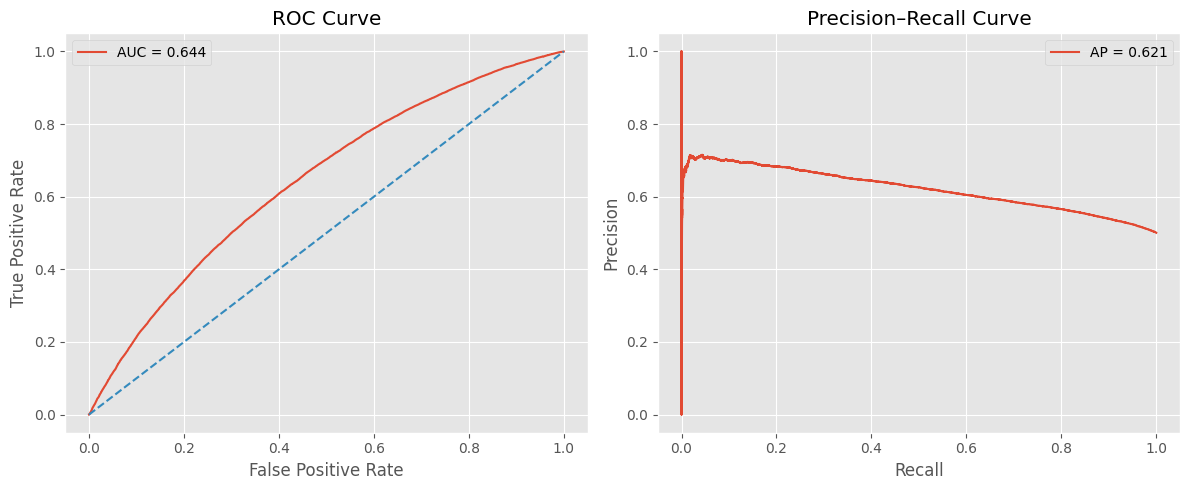

In [125]:
plot_curves(model,x_test_scaled,y_test)

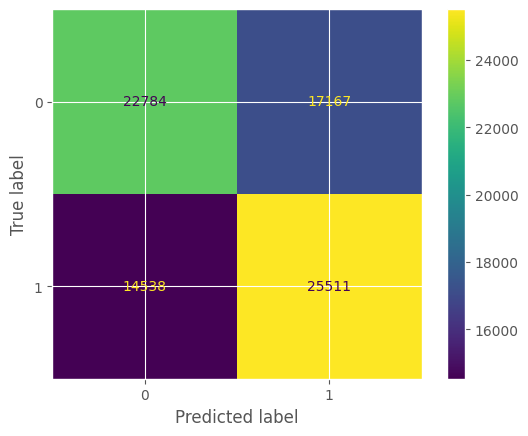

In [126]:
plot_confusion_matrix(y_test,y_pred)

__observation__:

the curve is above the diagonal line, it is not top left corner, mooth shape means logistic regression working correctly,
it does learn somethong but not strong

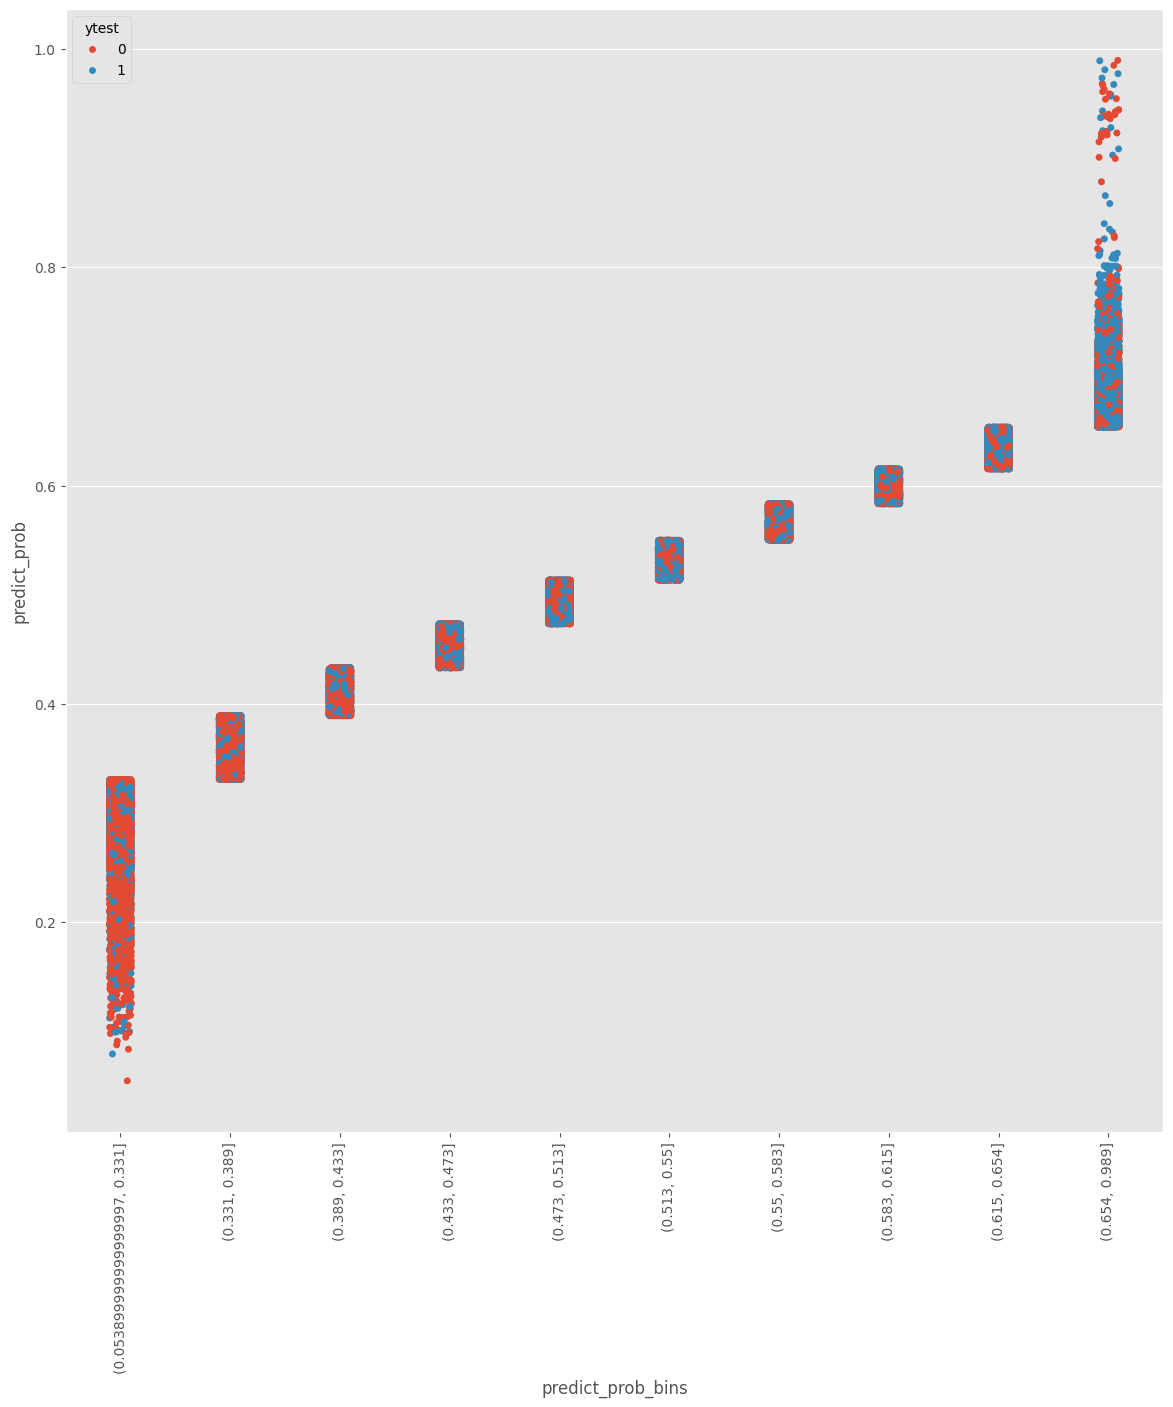

In [127]:
validation_rates(x_test_scaled,y_test,y_pred,model)

__observation__:

it provides idea about which probabability group  more wrong predictions are predicted, from above observations red and blue are spread out all over the bins, which means most of the predictions are wrong.

<h2>Before proceding statsmodels.api we need to reduce the number of features</h2>

In [128]:
weight_2,weight_1 =  check_pertubation(x_train_scaled,y_train,weight_1)
analyze_dataframe=make_dataframe(weight_2,weight_1, x_train)

In [129]:
analyze_dataframe

,columns,ratio,absolute_change
0,AVProductsInstalled,0.868211,0.230891
1,Census_ProcessorCoreCount,0.588941,1.094754
2,Census_PrimaryDiskTotalCapacity,0.137301,3.876123
3,Census_InternalPrimaryDiagonalDisplaySizeInInches,-0.033523,0.454238
4,Census_InternalPrimaryDisplayResolutionHorizontal,0.779109,0.165226
5,Census_InternalPrimaryDisplayResolutionVertical,0.049531,0.563529
6,Census_InternalBatteryNumberOfCharges,0.959399,0.005585
7,Census_IsSecureBootEnabled,1.189373,0.005690
8,Census_IsTouchEnabled,1.318214,0.025947
9,Wdft_IsGamer,1.078411,0.012072


In [130]:


column_high_chnge=list(analyze_dataframe.loc[(analyze_dataframe["absolute_change"]>1) & ((analyze_dataframe["ratio"]<= 0.5) | (analyze_dataframe["ratio"] > 2)),"columns"])
column_high_chnge
column_high_chnge.remove('AppVersion_2_fq')
column_high_chnge.remove('AppVersion_3_fq')

column_high_chnge

['Census_PrimaryDiskTotalCapacity',
 'dpi',
 'Screen_Area',
 'AppVersion_fq',
 'EngineVersion_2_fq']

In [131]:
aucScore=aucscore(model,x_test_scaled,y_test)
print(f"auc_old : {aucScore}")

x_train_imp=x_train.drop(columns=column_high_chnge)
x_test_imp = x_test.drop(columns=column_high_chnge)
x_train_scaled1,x_test_scaled1 = scaling_(x_train_imp,x_test_imp)
y_pred1,weight1_1,model1 = coeff_model1(x_test_scaled1,x_train_scaled1,y_train)
weight1_2,weight1_1 =  check_pertubation(x_train_scaled1,y_train,weight1_1)
make_dataframe(weight1_2,weight1_1, x_train_imp)
aucScore=aucscore(model1,x_test_scaled1,y_test)
print(f"new : {aucScore}")

auc_old : 0.6437807576359995
new : 0.6411822456116073


In [132]:
analyze_dataframe1=make_dataframe(weight1_2,weight1_1, x_train_imp)

In [133]:
analyze_dataframe1

,columns,ratio,absolute_change
0,AVProductsInstalled,0.892556,0.188183
1,Census_ProcessorCoreCount,0.443666,1.801176
2,Census_InternalPrimaryDiagonalDisplaySizeInInches,2.929875,0.074206
3,Census_InternalPrimaryDisplayResolutionHorizontal,1.006866,0.003559
4,Census_InternalPrimaryDisplayResolutionVertical,0.511418,0.160180
5,Census_InternalBatteryNumberOfCharges,0.998471,0.000190
6,Census_IsSecureBootEnabled,1.124026,0.003948
7,Census_IsTouchEnabled,1.054445,0.005538
8,Wdft_IsGamer,1.066822,0.010324
9,AvSigVersion_0,2.172862,0.072092


In [134]:
drop_features = [
    # numeric unstable

    "Census_InternalPrimaryDisplayResolutionHorizontal",
    "Census_InternalPrimaryDisplayResolutionVertical",

    # # frequency unstable
    # "Census_OSBuildNumber_fq",
    # "IeVerIdentifier_fq",
    # "Census_OSInstallLanguageIdentifier_fq",
    # "Census_OSUILocaleIdentifier_fq",

    # one-hot separation
    "OsSuite_784",
    "Census_PowerPlatformRoleName_Slate",
    "Census_OSWUAutoUpdateOptionsName_Off"
]


In [135]:

x_train_imp2=x_train_imp.drop(columns=drop_features)
x_test_imp2 = x_test_imp.drop(columns=drop_features)
x_train_scaled2,x_test_scaled2 = scaling_(x_train_imp2,x_test_imp2)
y_pred2,weight2_1,model2 = coeff_model1(x_test_scaled2,x_train_scaled2,y_train)
weight2_2,weight2_1 =  check_pertubation(x_train_scaled2,y_train,weight2_1)
df1=make_dataframe(weight2_2,weight2_1, x_train_imp2)
aucScore=aucscore(model2,x_test_scaled2,y_test)
print(f"new : {aucScore}")

new : 0.641090916099556


In [136]:
df1

,columns,ratio,absolute_change
0,AVProductsInstalled,0.936146,0.108663
1,Census_ProcessorCoreCount,0.442323,1.844438
2,Census_InternalPrimaryDiagonalDisplaySizeInInches,-21.234811,0.327744
3,Census_InternalBatteryNumberOfCharges,1.081235,0.009932
4,Census_IsSecureBootEnabled,1.150695,0.005058
5,Census_IsTouchEnabled,1.041718,0.004252
6,Wdft_IsGamer,1.081441,0.012591
7,AvSigVersion_0,1.258903,0.015765
8,primary_drive_c_ratio,0.949291,0.019415
9,non_primary_drive_MB,0.263434,0.205492


In [137]:
final_drop_features = [
    # numeric instability
    "EngineVersion_3_1",

    # frequency instability
    "EngineVersion_fq",

    # one-hot separation
    "SkuEdition_Enterprise",
    "Census_PrimaryDiskTypeName_Missing",
    "Census_PowerPlatformRoleName_PerformanceServer"
]


In [138]:

x_train_imp3=x_train_imp2.drop(columns=final_drop_features)
x_test_imp3 = x_test_imp2.drop(columns=final_drop_features)
x_train_scaled3,x_test_scaled3 = scaling_(x_train_imp3,x_test_imp3)
y_pred3,weight3_1,model3 = coeff_model1(x_test_scaled3,x_train_scaled3,y_train)
weight3_2,weight3_1 =  check_pertubation(x_train_scaled3,y_train,weight3_1)
df2=make_dataframe(weight3_2,weight3_1, x_train_imp3)
aucScore=aucscore(model3,x_test_scaled3,y_test)
print(f"new : {aucScore}")

new : 0.6381950198789017


In [139]:
df2

,columns,ratio,absolute_change
0,AVProductsInstalled,0.888140,0.198147
1,Census_ProcessorCoreCount,0.434530,1.810982
2,Census_InternalPrimaryDiagonalDisplaySizeInInches,69.184717,0.384653
3,Census_InternalBatteryNumberOfCharges,0.967027,0.004148
4,Census_IsSecureBootEnabled,1.158381,0.005303
5,Census_IsTouchEnabled,1.108169,0.010874
6,Wdft_IsGamer,1.047745,0.007736
7,AvSigVersion_0,-0.812959,0.109589
8,primary_drive_c_ratio,0.954910,0.016873
9,non_primary_drive_MB,0.017283,0.280298


In [140]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred3,y_test)
print(f"accuracy after feature dropping {acc}")
print(f"accuracy before feature dropping {accuracy_score(y_pred,y_test)}")


accuracy after feature dropping 0.6018875
accuracy before feature dropping 0.6036875


__VarianceThreshold method__: 
VarianceThreshold removes features that barely change and therefore carry almost no predictive information.

In [141]:
from sklearn.feature_selection import VarianceThreshold

In [142]:
vt = VarianceThreshold(0.0001)
x_train_imp3_vt = vt.fit_transform(x_train_imp3)


In [143]:
columns=x_train_imp3.columns[vt.get_support()]

In [144]:
columns.shape

(97,)

__Remove highly correlated feature__

In [145]:
x_=x_train_imp3[columns]
x_corr=x_.corr()
columns1=x_corr[x_corr>0.01].index
columns1.shape

(97,)

__Removing Rare Binary Column__

In [146]:
columns_number=list(x_.select_dtypes(include='number').columns)
columns_number

['AVProductsInstalled',
 'Census_ProcessorCoreCount',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalBatteryNumberOfCharges',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Wdft_IsGamer',
 'primary_drive_c_ratio',
 'non_primary_drive_MB',
 'aspect_ratio',
 'ram_per_processor',
 'AVProductStatesIdentifier_fq',
 'CountryIdentifier_fq',
 'GeoNameIdentifier_fq',
 'LocaleEnglishNameIdentifier_fq',
 'OsBuild_fq',
 'OsBuildLab_fq',
 'IeVerIdentifier_fq',
 'Census_MDC2FormFactor_fq',
 'Census_OEMNameIdentifier_fq',
 'Census_ChassisTypeName_fq',
 'Census_OSVersion_fq',
 'Census_OSBranch_fq',
 'Census_OSBuildNumber_fq',
 'Census_OSBuildRevision_fq',
 'Census_OSEdition_fq',
 'Census_OSSkuName_fq',
 'Census_OSInstallLanguageIdentifier_fq',
 'Census_OSUILocaleIdentifier_fq',
 'Census_FirmwareManufacturerIdentifier_fq',
 'Wdft_RegionIdentifier_fq',
 'AppVersion_2_fq',
 'AppVersion_3_fq',
 'AvSigVersion_1_fq',
 'OsBuildLab_0_fq',
 'OsBuildLab_1_fq',
 'OsBuildLab_3_

In [147]:
x_columns=list(x_[columns_number].columns[x_[columns_number].mean(0)>0.001])

In [148]:
len(x_columns)

92

__reducing using RandomForestClassifier__

Linear models assume:

no multicollinearity

linear relationships

independent features

it violates all three so better to use RandomForest for reducing features

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf =RandomForestClassifier(n_estimators=300,max_depth=10,n_jobs=-1,random_state=42)
rf.fit(x_[x_columns],y_train)
feature_important=rf.feature_importances_

In [151]:
col=pd.DataFrame(feature_important,columns=["important_feature"],index=x_columns).sort_values(by="important_feature",ascending=False).nlargest(30,columns="important_feature")
important_col = list(col.index)
important_col

['AVProductStatesIdentifier_fq',
 'AVProductsInstalled',
 'AvSigVersion_1_fq',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'AppVersion_3_fq',
 'AppVersion_2_fq',
 'OsBuildLab_2_amd64fre',
 'non_primary_drive_MB',
 'primary_drive_c_ratio',
 'Census_OEMNameIdentifier_fq',
 'aspect_ratio',
 'OsBuildLab_2_x86fre',
 'monitor_dims_fq',
 'CountryIdentifier_fq',
 'ram_per_processor',
 'Census_OSInstallTypeName_UUPUpgrade',
 'Census_ProcessorCoreCount',
 'Census_OSVersion_3_fq',
 'Census_OSVersion_fq',
 'OsBuildLab_fq',
 'Census_OSBuildRevision_fq',
 'Census_ChassisTypeName_fq',
 'Wdft_IsGamer',
 'Census_OSSkuName_fq',
 'Wdft_RegionIdentifier_fq',
 'Census_OSEdition_fq',
 'EngineVersion_3_4',
 'Census_FirmwareManufacturerIdentifier_fq',
 'GeoNameIdentifier_fq',
 'EngineVersion_3_2']

<h2> 2) statsmodel</h2>

__SM model__

In [152]:
import statsmodels.api as sm

In [153]:
x_t = x_test[important_col]
x_train_sc,x_test_sc =  scaling_(x_[important_col],x_t[important_col])

In [154]:
X = sm.add_constant(x_train_sc)
model_sm = sm.Logit(y_train, X).fit()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning:

divide by zero encountered in log



         Current function value: inf
         Iterations: 35


C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [155]:
model_sm.summary

<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x000001F9FF1DBCB0>>

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def splitting(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    return x,y

def vif(x_tr):
     vif = [variance_inflation_factor(x_tr.values,i) for i in range(x_tr.shape[1])]
     df=pd.DataFrame(columns=["features","vif"])
     df["features"]=x_tr.columns
     df["vif"]=vif
     return df.sort_values("vif", ascending=False)
    

In [158]:
model_sm.summary()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319969
Method:                           MLE   Df Model:                           30
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                    -inf
Time:                        10:21:49   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.188e+06   1.33e+05     23.987      0.000    2.93e+06    3.45e+06
x1             0.2451      0.017     14.826      0.000       0.213       0.278
x2            -1.7655      0.059    -29.866      0.000      -1.881      -1.650
x3             0.3084      0.016     19.017      0.000       0.277       0.340
x4             0.9086      0.095      9.597      0.000       0.723       1.094
x5             0.0276      0.158      0.174      0.862      -0.283       0.338
x6            -0.0138      0.160     -0.086      0.932      -0.328       0.301
x7         -3.188e+06   1.33e+05    -23.987      0.000   -3.45e+06   -2.93e+06
x8            -0.3601      0.284     -1.266      0.205      -0.917       0.197
x9            -0.4032      0.026    -15.807      0.000      -0.453      -0.353
x10            0.2192      0.012     18.117      0.000       0.196       0.243
x11            1.2715      0.158      8.029      0.000       0.961       1.582
x12        -3.188e+06   1.33e+05    -23.987      0.000   -3.45e+06   -2.93e+06
x13            0.1212      0.012     10.342      0.000       0.098       0.144
x14            0.2060      0.014     14.324      0.000       0.178       0.234
x15            2.0198      0.148     13.608      0.000       1.729       2.311
x16            0.1910      0.009     21.569      0.000       0.174       0.208
x17            3.0561      0.172     17.735      0.000       2.718       3.394
x18         1.004e+04    908.175     11.053      0.000    8258.439    1.18e+04
x19            0.3586      0.344      1.042      0.297      -0.316       1.033
x20           -0.1690      0.013    -12.651      0.000      -0.195      -0.143
x21        -1.004e+04    908.199    -11.053      0.000   -1.18e+04   -8258.573
x22            0.0881      0.010      8.533      0.000       0.068       0.108
x23            0.1592      0.008     18.834      0.000       0.143       0.176
x24           -0.1042      0.053     -1.980      0.048      -0.207      -0.001
x25            0.2606      0.013     19.778      0.000       0.235       0.286
x26           -0.0523      0.051     -1.028      0.304      -0.152       0.047
x27           -0.2366      0.023    -10.325      0.000      -0.281      -0.192
x28            0.1107      0.011     10.311      0.000       0.090       0.132
x29            0.0056      0.011      0.518      0.604      -0.016       0.027
x30           -0.2617      0.025    -10.638      0.000      -0.310      -0.213
==============================================================================
"""

lets check the mulicolinearity using pertubation technique

In [159]:
variance_infl1=vif(x_[important_col])

In [160]:
variance_infl1

,features,vif
17,Census_OSVersion_3_fq,760646.175940
20,Census_OSBuildRevision_fq,758625.627943
18,Census_OSVersion_fq,2027.696052
5,AppVersion_2_fq,1125.924425
4,AppVersion_3_fq,1095.987174
6,OsBuildLab_2_amd64fre,274.421335
10,aspect_ratio,205.570799
23,Census_OSSkuName_fq,160.131683
25,Census_OSEdition_fq,146.615531
1,AVProductsInstalled,31.267895


In [161]:
[important_col.remove(col) for col in ["Census_OSVersion_3_fq","Census_OSBuildRevision_fq"]]
important_col

['AVProductStatesIdentifier_fq',
 'AVProductsInstalled',
 'AvSigVersion_1_fq',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'AppVersion_3_fq',
 'AppVersion_2_fq',
 'OsBuildLab_2_amd64fre',
 'non_primary_drive_MB',
 'primary_drive_c_ratio',
 'Census_OEMNameIdentifier_fq',
 'aspect_ratio',
 'OsBuildLab_2_x86fre',
 'monitor_dims_fq',
 'CountryIdentifier_fq',
 'ram_per_processor',
 'Census_OSInstallTypeName_UUPUpgrade',
 'Census_ProcessorCoreCount',
 'Census_OSVersion_fq',
 'OsBuildLab_fq',
 'Census_ChassisTypeName_fq',
 'Wdft_IsGamer',
 'Census_OSSkuName_fq',
 'Wdft_RegionIdentifier_fq',
 'Census_OSEdition_fq',
 'EngineVersion_3_4',
 'Census_FirmwareManufacturerIdentifier_fq',
 'GeoNameIdentifier_fq',
 'EngineVersion_3_2']

In [162]:
x_train_sc1,x_test_sc2=scaling_(x_[important_col],x_test[important_col])

In [163]:
X = sm.add_constant(x_train_sc1)
model_sm1 = sm.Logit(y_train, X).fit()
model_sm1.summary()

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning:

divide by zero encountered in log

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



         Current function value: inf
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319971
Method:                           MLE   Df Model:                           28
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                    -inf
Time:                        10:22:42   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.188e+06   1.38e+05     23.026      0.000    2.92e+06    3.46e+06
x1             0.2415      0.017     14.615      0.000       0.209       0.274
x2            -1.7864      0.059    -30.227      0.000      -1.902      -1.671
x3             0.3098      0.016     19.111      0.000       0.278       0.342
x4             0.9179      0.095      9.697      0.000       0.732       1.103
x5            -0.0418      0.156     -0.269      0.788      -0.347       0.264
x6             0.0513      0.158      0.325      0.745      -0.258       0.361
x7         -3.188e+06   1.38e+05    -23.026      0.000   -3.46e+06   -2.92e+06
x8            -0.3368      0.284     -1.185      0.236      -0.894       0.220
x9            -0.4045      0.026    -15.863      0.000      -0.454      -0.355
x10            0.2189      0.012     18.094      0.000       0.195       0.243
x11            1.2534      0.158      7.921      0.000       0.943       1.564
x12        -3.188e+06   1.38e+05    -23.026      0.000   -3.46e+06   -2.92e+06
x13            0.1185      0.012     10.121      0.000       0.096       0.141
x14            0.2034      0.014     14.148      0.000       0.175       0.232
x15            2.0329      0.148     13.698      0.000       1.742       2.324
x16            0.1835      0.009     20.798      0.000       0.166       0.201
x17            3.0895      0.172     17.928      0.000       2.752       3.427
x18            0.1440      0.014     10.218      0.000       0.116       0.172
x19           -0.1325      0.013    -10.252      0.000      -0.158      -0.107
x20            0.0860      0.010      8.330      0.000       0.066       0.106
x21            0.1597      0.008     18.895      0.000       0.143       0.176
x22           -0.1168      0.053     -2.221      0.026      -0.220      -0.014
x23            0.2610      0.013     19.824      0.000       0.235       0.287
x24           -0.0411      0.051     -0.809      0.418      -0.141       0.058
x25           -0.2423      0.023    -10.577      0.000      -0.287      -0.197
x26            0.1117      0.011     10.408      0.000       0.091       0.133
x27            0.0082      0.011      0.756      0.449      -0.013       0.030
x28           -0.2695      0.025    -10.963      0.000      -0.318      -0.221
==============================================================================
"""

In [164]:
variance_infl2=vif(x_[important_col])

In [165]:
variance_infl2

,features,vif
5,AppVersion_2_fq,1090.987574
4,AppVersion_3_fq,1062.869069
6,OsBuildLab_2_amd64fre,274.068407
10,aspect_ratio,205.403492
21,Census_OSSkuName_fq,160.131494
23,Census_OSEdition_fq,146.607256
1,AVProductsInstalled,31.266473
11,OsBuildLab_2_x86fre,27.348758
8,primary_drive_c_ratio,19.656057
2,AvSigVersion_1_fq,15.980707


In [166]:
[important_col.remove(col) for col in ["AppVersion_2_fq"]]

[None]

In [167]:
x_train_sc2,x_test_sc2=scaling_(x_[important_col],x_test[important_col])
X = sm.add_constant(x_train_sc2)
model_sm1 = sm.Logit(y_train, X).fit_regularized(
    alpha=0.5,
    L1_wt=0.5,
    maxiter=2000
)
model_sm1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6678177546385332
            Iterations: 617
            Function evaluations: 617
            Gradient evaluations: 617


C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning:

QC check did not pass for 2 out of 28 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning:

Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319972
Method:                           MLE   Df Model:                           27
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                 0.03658
Time:                        10:23:48   Log-Likelihood:            -2.1369e+05
converged:                       True   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5344      0.856     -4.128      0.000      -5.212      -1.856
x1             0.2438      0.016     14.840      0.000       0.212       0.276
x2            -1.7783      0.059    -30.348      0.000      -1.893      -1.663
x3             0.3110      0.016     19.180      0.000       0.279       0.343
x4             0.9114      0.095      9.630      0.000       0.726       1.097
x5             0.0090      0.010      0.945      0.345      -0.010       0.028
x6             2.4363      0.855      2.850      0.004       0.761       4.112
x7            -0.2823      0.284     -0.993      0.321      -0.840       0.275
x8            -0.3993      0.026    -15.657      0.000      -0.449      -0.349
x9             0.2189      0.012     18.094      0.000       0.195       0.243
x10            1.2677      0.158      8.010      0.000       0.957       1.578
x11            2.0002      0.855      2.340      0.019       0.325       3.676
x12            0.1178      0.012     10.059      0.000       0.095       0.141
x13            0.2041      0.014     14.196      0.000       0.176       0.232
x14            2.0212      0.148     13.621      0.000       1.730       2.312
x15            0.1834      0.009     20.801      0.000       0.166       0.201
x16            3.0949      0.172     17.959      0.000       2.757       3.433
x17            0.1446      0.014     10.260      0.000       0.117       0.172
x18           -0.1326      0.013    -10.415      0.000      -0.158      -0.108
x19            0.0859      0.010      8.320      0.000       0.066       0.106
x20            0.1597      0.008     18.909      0.000       0.143       0.176
x21           -0.1157      0.053     -2.199      0.028      -0.219      -0.013
x22            0.2613      0.013     19.854      0.000       0.236       0.287
x23           -0.0411      0.051     -0.808      0.419      -0.141       0.059
x24           -0.2400      0.023    -10.507      0.000      -0.285      -0.195
x25            0.1112      0.011     10.360      0.000       0.090       0.132
x26            0.0092      0.011      0.844      0.399      -0.012       0.030
x27           -0.2682      0.025    -10.911      0.000      -0.316      -0.220
==============================================================================
"""

In [168]:
variance_infl3=vif(x_[important_col])

In [169]:
variance_infl3

,features,vif
5,OsBuildLab_2_amd64fre,273.629981
9,aspect_ratio,205.397317
20,Census_OSSkuName_fq,160.117386
22,Census_OSEdition_fq,146.605290
1,AVProductsInstalled,30.765585
10,OsBuildLab_2_x86fre,27.336767
7,primary_drive_c_ratio,19.654473
2,AvSigVersion_1_fq,15.980385
0,AVProductStatesIdentifier_fq,13.055470
3,Census_InternalPrimaryDiagonalDisplaySizeInInches,11.190578


In [170]:
[important_col.remove(col) for col in ["non_primary_drive_MB","EngineVersion_3_2"]]
x_train_sc3,x_test_sc3=scaling_(x_[important_col],x_test[important_col])
X = sm.add_constant(x_train_sc3)
model_sm2 = sm.Logit(y_train, X).fit_regularized(
    alpha=0.5,
    L1_wt=0.5,
    maxiter=2000
)
model_sm2.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6680069055093005
            Iterations: 555
            Function evaluations: 555
            Gradient evaluations: 555


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319974
Method:                           MLE   Df Model:                           25
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                 0.03631
Time:                        10:24:48   Log-Likelihood:            -2.1375e+05
converged:                       True   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6462      0.858     -4.249      0.000      -5.328      -1.964
x1             0.2465      0.016     15.012      0.000       0.214       0.279
x2            -1.7578      0.059    -30.033      0.000      -1.873      -1.643
x3             0.3978      0.014     27.993      0.000       0.370       0.426
x4             0.9110      0.095      9.631      0.000       0.726       1.096
x5             0.0109      0.010      1.143      0.253      -0.008       0.030
x6             2.4450      0.857      2.853      0.004       0.765       4.125
x7            -0.3794      0.016    -23.115      0.000      -0.412      -0.347
x8             0.2198      0.012     18.176      0.000       0.196       0.244
x9             1.2601      0.158      7.963      0.000       0.950       1.570
x10            2.0068      0.857      2.341      0.019       0.327       3.687
x11            0.1171      0.012     10.003      0.000       0.094       0.140
x12            0.2033      0.014     14.149      0.000       0.175       0.231
x13            2.0290      0.148     13.680      0.000       1.738       2.320
x14            0.1814      0.009     20.586      0.000       0.164       0.199
x15            3.1240      0.172     18.128      0.000       2.786       3.462
x16            0.1446      0.014     10.266      0.000       0.117       0.172
x17           -0.1349      0.013    -10.601      0.000      -0.160      -0.110
x18            0.0856      0.010      8.296      0.000       0.065       0.106
x19            0.1603      0.008     18.980      0.000       0.144       0.177
x20           -0.1148      0.053     -2.182      0.029      -0.218      -0.012
x21            0.2635      0.013     20.028      0.000       0.238       0.289
x22           -0.0424      0.051     -0.834      0.404      -0.142       0.057
x23           -0.1578      0.022     -7.301      0.000      -0.200      -0.115
x24            0.1117      0.011     10.409      0.000       0.091       0.133
x25            0.0091      0.011      0.833      0.405      -0.012       0.030
==============================================================================
"""

In [171]:
variance_infl4=vif(x_[important_col])
variance_infl4

,features,vif
5,OsBuildLab_2_amd64fre,250.782916
8,aspect_ratio,205.379556
19,Census_OSSkuName_fq,160.114102
21,Census_OSEdition_fq,146.600475
1,AVProductsInstalled,30.727485
9,OsBuildLab_2_x86fre,24.996192
0,AVProductStatesIdentifier_fq,13.050114
2,AvSigVersion_1_fq,12.208630
3,Census_InternalPrimaryDiagonalDisplaySizeInInches,11.179479
6,primary_drive_c_ratio,8.146206


In [172]:
[important_col.remove(col) for col in ["OsBuildLab_2_amd64fre","primary_drive_c_ratio"]]
x_train_sc4,x_test_sc4=scaling_(x_[important_col],x_test[important_col])
X = sm.add_constant(x_train_sc4)
model_sm3 = sm.Logit(y_train, X).fit_regularized(
    alpha=0.5,
    L1_wt=0.5,
    maxiter=2000
)
model_sm3.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6688692450866489
            Iterations: 458
            Function evaluations: 459
            Gradient evaluations: 458


C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning:

QC check did not pass for 1 out of 24 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers

C:\Users\prasa\OneDrive\Desktop\projects\microsoft_fraud _deteceion\microsoft_fraud_detection_ori\venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning:

Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319976
Method:                           MLE   Df Model:                           23
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                 0.03505
Time:                        10:25:35   Log-Likelihood:            -2.1403e+05
converged:                       True   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3884      0.046    -29.879      0.000      -1.479      -1.297
x1             0.2403      0.016     14.640      0.000       0.208       0.272
x2            -1.8132      0.059    -30.994      0.000      -1.928      -1.699
x3             0.4010      0.014     28.239      0.000       0.373       0.429
x4             0.9698      0.095     10.248      0.000       0.784       1.155
x5             0.0021      0.010      0.217      0.828      -0.017       0.021
x6             0.2298      0.012     19.022      0.000       0.206       0.253
x7             1.2230      0.158      7.740      0.000       0.913       1.533
x8            -0.4228      0.015    -28.547      0.000      -0.452      -0.394
x9             0.1316      0.012     11.271      0.000       0.109       0.155
x10            0.2104      0.014     14.655      0.000       0.182       0.239
x11            1.7409      0.148     11.797      0.000       1.452       2.030
x12            0.1815      0.009     20.618      0.000       0.164       0.199
x13            2.8855      0.172     16.817      0.000       2.549       3.222
x14            0.1494      0.014     10.616      0.000       0.122       0.177
x15           -0.1324      0.013    -10.416      0.000      -0.157      -0.108
x16            0.0808      0.010      7.838      0.000       0.061       0.101
x17            0.1659      0.008     19.678      0.000       0.149       0.182
x18           -0.1189      0.053     -2.260      0.024      -0.222      -0.016
x19            0.2449      0.013     18.667      0.000       0.219       0.271
x20           -0.0684      0.051     -1.347      0.178      -0.168       0.031
x21           -0.1564      0.022     -7.242      0.000      -0.199      -0.114
x22            0.1311      0.011     12.266      0.000       0.110       0.152
x23            0.0453      0.011      4.220      0.000       0.024       0.066
==============================================================================
"""

In [173]:
variance_infl5=vif(x_[important_col])
variance_infl5

,features,vif
17,Census_OSSkuName_fq,158.577710
19,Census_OSEdition_fq,146.527117
6,aspect_ratio,96.968497
1,AVProductsInstalled,25.050820
2,AvSigVersion_1_fq,12.016223
3,Census_InternalPrimaryDiagonalDisplaySizeInInches,11.165192
0,AVProductStatesIdentifier_fq,10.851948
18,Wdft_RegionIdentifier_fq,6.294592
12,Census_ProcessorCoreCount,5.618187
8,monitor_dims_fq,5.427070


In [174]:
[important_col.remove(col) for col in ["Census_OSSkuName_fq"]]
x_train_sc5,x_test_sc5=scaling_(x_[important_col],x_test[important_col])
X = sm.add_constant(x_train_sc5)
model_sm4 = sm.Logit(y_train, X).fit_regularized(
    alpha=0.5,
    L1_wt=0.5,
    maxiter=2000
)
model_sm4.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6688771972333071
            Iterations: 495
            Function evaluations: 495
            Gradient evaluations: 495


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319977
Method:                           MLE   Df Model:                           22
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                 0.03504
Time:                        10:26:19   Log-Likelihood:            -2.1403e+05
converged:                       True   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4006      0.046    -30.352      0.000      -1.491      -1.310
x1             0.2404      0.016     14.647      0.000       0.208       0.273
x2            -1.8097      0.058    -30.946      0.000      -1.924      -1.695
x3             0.4008      0.014     28.228      0.000       0.373       0.429
x4             0.9704      0.095     10.255      0.000       0.785       1.156
x5             0.0018      0.010      0.188      0.851      -0.017       0.020
x6             0.2311      0.012     19.156      0.000       0.207       0.255
x7             1.2246      0.158      7.749      0.000       0.915       1.534
x8            -0.4234      0.015    -28.592      0.000      -0.452      -0.394
x9             0.1315      0.012     11.263      0.000       0.109       0.154
x10            0.2125      0.014     14.834      0.000       0.184       0.241
x11            1.7371      0.148     11.773      0.000       1.448       2.026
x12            0.1814      0.009     20.607      0.000       0.164       0.199
x13            2.8958      0.172     16.882      0.000       2.560       3.232
x14            0.1495      0.014     10.618      0.000       0.122       0.177
x15           -0.1331      0.013    -10.475      0.000      -0.158      -0.108
x16            0.0811      0.010      7.872      0.000       0.061       0.101
x17            0.1657      0.008     19.654      0.000       0.149       0.182
x18            0.2455      0.013     18.718      0.000       0.220       0.271
x19           -0.1772      0.016    -10.764      0.000      -0.209      -0.145
x20           -0.1566      0.022     -7.252      0.000      -0.199      -0.114
x21            0.1317      0.011     12.323      0.000       0.111       0.153
x22            0.0449      0.011      4.185      0.000       0.024       0.066
==============================================================================
"""

In [175]:
variance_infl6=vif(x_[important_col])
variance_infl6

,features,vif
6,aspect_ratio,96.044359
1,AVProductsInstalled,25.041963
18,Census_OSEdition_fq,13.962207
2,AvSigVersion_1_fq,12.012623
3,Census_InternalPrimaryDiagonalDisplaySizeInInches,11.165192
0,AVProductStatesIdentifier_fq,10.832530
17,Wdft_RegionIdentifier_fq,6.294572
12,Census_ProcessorCoreCount,5.615478
8,monitor_dims_fq,5.424931
14,OsBuildLab_fq,5.395727


In [176]:
[important_col.remove(col) for col in ["aspect_ratio"]]


[None]

In [177]:
x_train_sc6,x_test_sc6=scaling_(x_[important_col],x_test[important_col])
X = sm.add_constant(x_train_sc6)
model_sm5 = sm.Logit(y_train, X).fit_regularized(
    alpha=0.5,
    L1_wt=0.5,
    maxiter=2000
)
model_sm5.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6689720978451926
            Iterations: 476
            Function evaluations: 476
            Gradient evaluations: 476


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319980
Method:                           MLE   Df Model:                           19
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                 0.03366
Time:                        10:26:59   Log-Likelihood:            -2.1434e+05
converged:                       True   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1464      0.032    -35.874      0.000      -1.209      -1.084
x1             0.2396      0.016     14.575      0.000       0.207       0.272
x2            -1.8064      0.059    -30.668      0.000      -1.922      -1.691
x3             0.4000      0.013     29.788      0.000       0.374       0.426
x4             1.1195      0.092     12.156      0.000       0.939       1.300
x5                  0        nan        nan        nan         nan         nan
x6             0.2366      0.012     20.298      0.000       0.214       0.259
x7            -0.4292      0.015    -28.928      0.000      -0.458      -0.400
x8             0.1744      0.010     16.938      0.000       0.154       0.195
x9             0.2142      0.014     14.971      0.000       0.186       0.242
x10            1.7979      0.147     12.239      0.000       1.510       2.086
x11            0.1827      0.009     20.791      0.000       0.165       0.200
x12            3.0657      0.169     18.139      0.000       2.734       3.397
x13            0.1511      0.014     10.807      0.000       0.124       0.179
x14           -0.1340      0.013    -10.659      0.000      -0.159      -0.109
x15            0.0889      0.010      8.681      0.000       0.069       0.109
x16            0.1674      0.008     19.965      0.000       0.151       0.184
x17            0.2435      0.013     18.562      0.000       0.218       0.269
x18           -0.1775      0.016    -10.805      0.000      -0.210      -0.145
x19           -0.1583      0.022     -7.279      0.000      -0.201      -0.116
x20                 0        nan        nan        nan         nan         nan
x21            0.0440      0.011      4.105      0.000       0.023       0.065
==============================================================================
"""

In [178]:
variance_infl6=vif(x_[important_col])
variance_infl6

,features,vif
1,AVProductsInstalled,18.142301
17,Census_OSEdition_fq,12.499642
2,AvSigVersion_1_fq,11.817630
3,Census_InternalPrimaryDiagonalDisplaySizeInInches,9.995168
0,AVProductStatesIdentifier_fq,8.327974
16,Wdft_RegionIdentifier_fq,6.007290
13,OsBuildLab_fq,5.394317
11,Census_ProcessorCoreCount,5.331458
9,ram_per_processor,5.053075
14,Census_ChassisTypeName_fq,4.833502


In [179]:
[important_col.remove(col) for col in ["AVProductsInstalled"]]

[None]

In [180]:
x_train_sc7,x_test_sc7=scaling_(x_[important_col],x_test[important_col])
X = sm.add_constant(x_train_sc7)
model_sm6 = sm.Logit(y_train, X).fit_regularized(
    alpha=0.5,
    L1_wt=0.5,
    maxiter=2000
)
model_sm6.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6704893091173973
            Iterations: 397
            Function evaluations: 397
            Gradient evaluations: 397


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319979
Method:                           MLE   Df Model:                           20
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                 0.03271
Time:                        10:27:33   Log-Likelihood:            -2.1455e+05
converged:                       True   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5261      0.030    -50.801      0.000      -1.585      -1.467
x1             0.6818      0.008     82.630      0.000       0.666       0.698
x2             0.3673      0.014     25.989      0.000       0.340       0.395
x3             1.1260      0.093     12.139      0.000       0.944       1.308
x4            -0.0029      0.009     -0.305      0.761      -0.021       0.016
x5             0.2225      0.012     18.508      0.000       0.199       0.246
x6            -0.4251      0.015    -28.726      0.000      -0.454      -0.396
x7             0.1712      0.010     16.642      0.000       0.151       0.191
x8             0.2001      0.014     13.999      0.000       0.172       0.228
x9             1.7428      0.147     11.846      0.000       1.454       2.031
x10            0.1698      0.009     19.362      0.000       0.153       0.187
x11            3.0610      0.170     17.975      0.000       2.727       3.395
x12            0.1432      0.014     10.198      0.000       0.116       0.171
x13           -0.1468      0.013    -11.572      0.000      -0.172      -0.122
x14            0.0822      0.010      8.020      0.000       0.062       0.102
x15            0.1582      0.008     18.821      0.000       0.142       0.175
x16            0.2396      0.013     18.302      0.000       0.214       0.265
x17           -0.1662      0.016    -10.123      0.000      -0.198      -0.134
x18           -0.1483      0.022     -6.871      0.000      -0.191      -0.106
x19            0.1246      0.011     11.676      0.000       0.104       0.145
x20            0.0577      0.011      5.387      0.000       0.037       0.079
==============================================================================
"""

In [181]:
variance_infl7=vif(x_[important_col])
variance_infl7

,features,vif
1,AvSigVersion_1_fq,11.118953
16,Census_OSEdition_fq,10.861914
2,Census_InternalPrimaryDiagonalDisplaySizeInInches,9.510991
15,Wdft_RegionIdentifier_fq,5.552077
12,OsBuildLab_fq,5.389595
10,Census_ProcessorCoreCount,5.186731
8,ram_per_processor,4.928638
13,Census_ChassisTypeName_fq,4.726378
4,Census_OEMNameIdentifier_fq,4.396561
6,monitor_dims_fq,4.301856


In [182]:
[important_col.remove(col) for col in ["Census_OEMNameIdentifier_fq"]]

[None]

In [183]:
x_train_sc8,x_test_sc8=scaling_(x_[important_col],x_test[important_col])
model_sm7 = sm.Logit(y_train, x_train_sc8).fit_regularized(
    alpha=0.5,
    L1_wt=0.5,
    maxiter=2000
)
model_sm7.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6745858382923762
            Iterations: 384
            Function evaluations: 384
            Gradient evaluations: 384


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          HasDetections   No. Observations:               320000
Model:                          Logit   Df Residuals:                   319983
Method:                           MLE   Df Model:                           16
Date:                Fri, 23 Jan 2026   Pseudo R-squ.:                -0.02707
Time:                        10:28:04   Log-Likelihood:            -2.2781e+05
converged:                       True   LL-Null:                   -2.2181e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6186      0.008     75.637      0.000       0.603       0.635
x2             0.1472      0.013     11.441      0.000       0.122       0.172
x3            -0.0526      0.089     -0.592      0.554      -0.227       0.122
x4             0.0065      0.010      0.668      0.504      -0.013       0.026
x5            -0.5429      0.014    -38.822      0.000      -0.570      -0.516
x6             0.0659      0.009      7.331      0.000       0.048       0.084
x7            -0.0900      0.013     -6.733      0.000      -0.116      -0.064
x8             0.1446      0.144      1.006      0.314      -0.137       0.426
x9             0.1390      0.009     15.291      0.000       0.121       0.157
x10            1.2458      0.168      7.430      0.000       0.917       1.574
x11            0.1498      0.015     10.281      0.000       0.121       0.178
x12           -0.1578      0.013    -12.074      0.000      -0.183      -0.132
x13                 0        nan        nan        nan         nan         nan
x14            0.1470      0.009     16.824      0.000       0.130       0.164
x15           -0.0318      0.012     -2.662      0.008      -0.055      -0.008
x16                 0        nan        nan        nan         nan         nan
x17           -0.3560      0.020    -17.730      0.000      -0.395      -0.317
x18            0.0153      0.011      1.454      0.146      -0.005       0.036
x19           -0.0054      0.011     -0.491      0.624      -0.027       0.016
==============================================================================
"""

In [184]:
variance_infl8=vif(x_[important_col])
variance_infl8

,features,vif
1,AvSigVersion_1_fq,11.007108
15,Census_OSEdition_fq,10.781124
2,Census_InternalPrimaryDiagonalDisplaySizeInInches,9.490278
14,Wdft_RegionIdentifier_fq,5.453460
11,OsBuildLab_fq,5.389595
9,Census_ProcessorCoreCount,5.167357
7,ram_per_processor,4.915390
12,Census_ChassisTypeName_fq,4.440328
5,monitor_dims_fq,4.133238
3,AppVersion_3_fq,4.028806


In [185]:
x_train_sc8.shape

(320000, 19)

In [186]:
x_test_sc8.shape

(80000, 19)

In [187]:
model_sm7.model.exog_names


['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19']

In [188]:
y_=model_sm7.predict(x_test_sc8)
y_.shape
y_pred=(y_ >=0.5).astype(int)
accuracy = (y_pred==y_test).sum()/len(y_test)
accuracy 

np.float64(0.51935)

In [189]:
# x_test_sc8 = x_test_sc8[model_sm7.model.exog_names]


In [198]:
logisti_smc_report_df=classification("from sm_model",model_sm7,y_pred,y_test,x_test_sc8,is_predict_proba=False)
logisti_smc_report_df

,TruePositiveRate,FalsePositiveRate,TrueNegativeRate,FalseNegativeRate,accuracyScore,precisionScore,recallScore,roc_score,f1Score,cindex
from sm_model,0.964219,0.92661,0.07339,0.035781,0.51935,0.510557,0.964219,0.6098,0.667612,0.6098


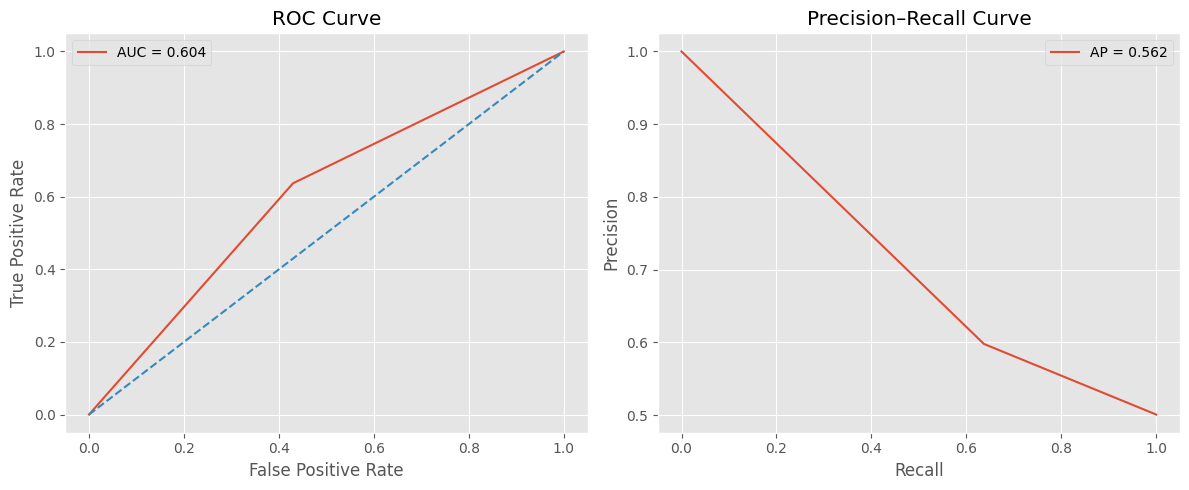

In [199]:
plot_curves(model,x_test_scaled,y_test,is_predict_proba=False)

__Observation from the results__

The model shows high recall (0.964), meaning it correctly identifies most fraud cases.

However, the false positive rate is extremely high (0.93), indicating many normal transactions are wrongly classified as fraud.

The true negative rate is very low (0.07), showing poor ability to identify non-fraud cases.

Overall accuracy is only 52%, which is close to random guessing.

The ROC–AUC score of ~0.60 indicates weak to moderate discrimination power.

The Precision–Recall curve (AP ≈ 0.56) suggests limited precision despite high recall.

The F1-score (0.67) reflects imbalance caused by excessive positive predictions.

The C-index equals ROC–AUC, confirming correct probability ranking evaluation.

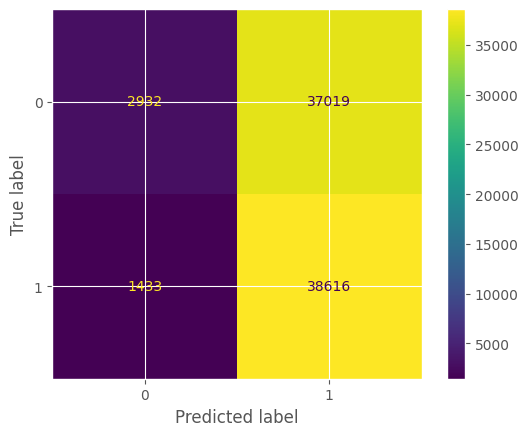

In [201]:
plot_confusion_matrix(y_test,y_pred)

__observation__

low precision

high recall

low specificity(1-specificity = FPR WHICH IS HIGHER)



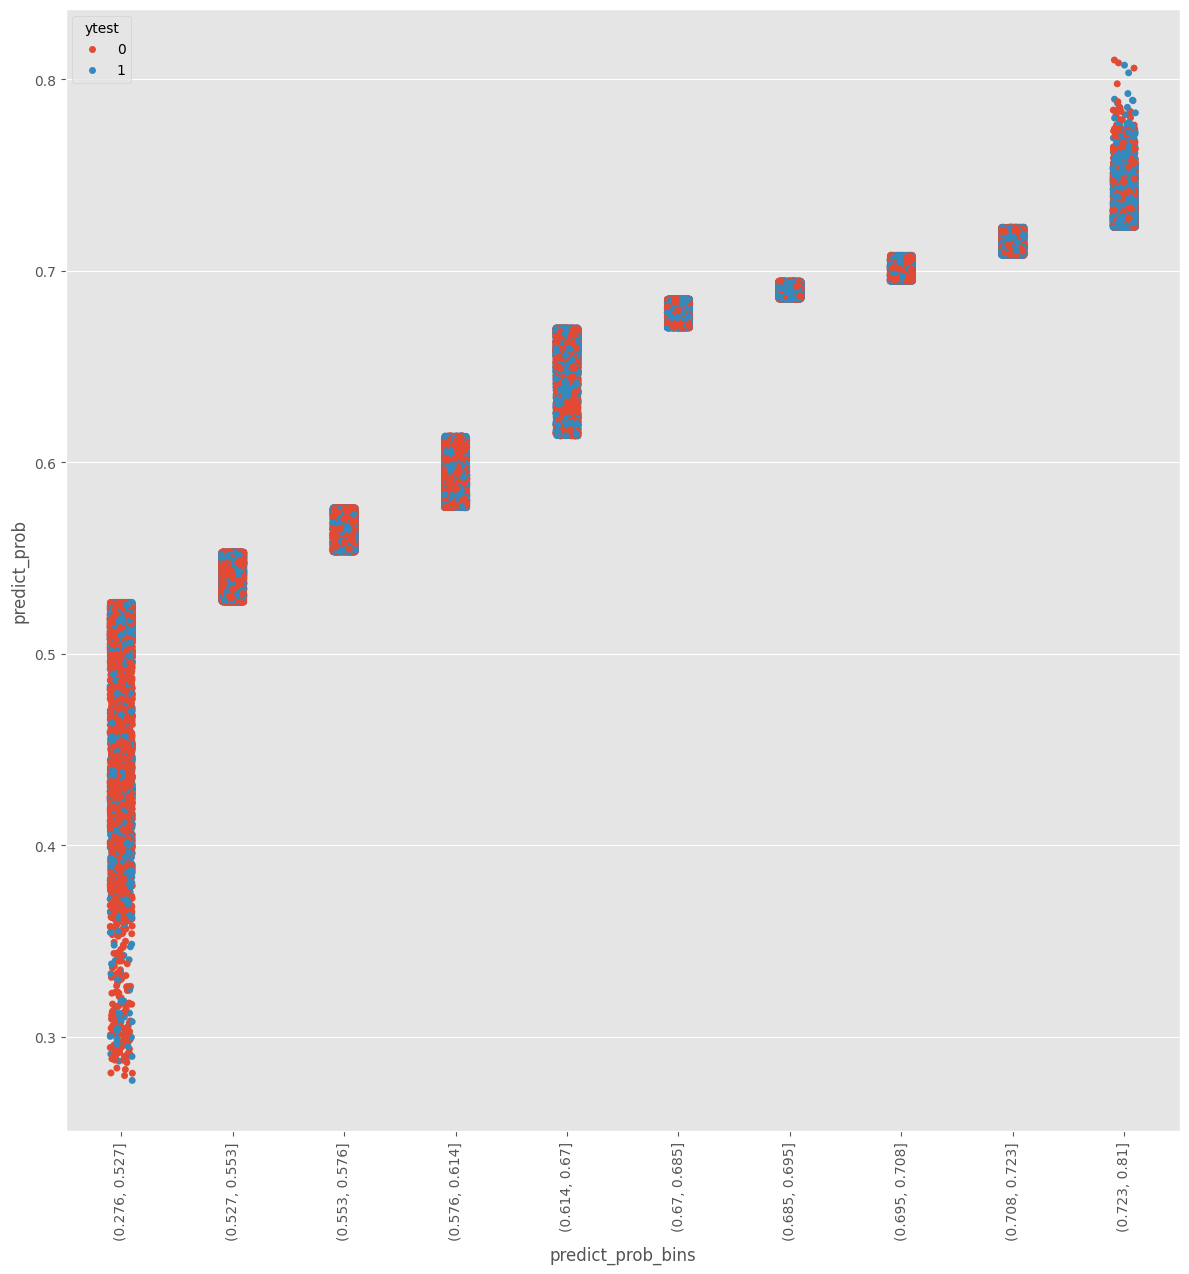

In [205]:
validation_rates(x_test_sc8,y_test,y_pred,model_sm7,is_predict_proba=False)